In [209]:
import pandas as pd
from rdkit import Chem

def prepare_data():
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.01.25.csv', index_col=0)
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv', index_col=0)

    SMILES_to_fgroup = {}
    SMILES_to_identificator = {}
    SMILES_to_cycle_type = {}
    SMILES_to_pKa = {}
    for index, row in df_main.iterrows():
        SMILES = row['Smiles']
        if pd.isnull(SMILES):
            continue
        
        SMILES_to_fgroup[SMILES] = row['F group']
        SMILES_to_identificator[SMILES] = row['identificator']
        SMILES_to_cycle_type[SMILES] = row['Framework']
        SMILES_to_pKa[SMILES] = row['pKa']
    
    return SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa

def train_test_smiles_data(is_canon=True):
    train = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKa_basicity_data\gnn_cv_canon_smiles\train_basic.csv')
    test = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKa_basicity_data\gnn_cv_canon_smiles\test_basic.csv')

    train_SMILES = train['Smiles'].tolist()
    test_SMILES = test['Smiles'].tolist()

    smiles_to_fold = {}
    for index, row in train.iterrows():
        smiles_to_fold[row['Smiles']] = row['fold_id']

    if is_canon:
        for train_index in range(len(train_SMILES)):
            train_SMILES[train_index] = Chem.CanonSmiles(train_SMILES[train_index])
        for test_index in range(len(test_SMILES)):
            test_SMILES[test_index] = Chem.CanonSmiles(test_SMILES[test_index])
    
    return train_SMILES, test_SMILES, smiles_to_fold

In [210]:
SMILES_to_pKa_oos = {'FC(F)(F)C12CCC(CN1)C2': (6.23, 6.277562618255615), 'FC(F)(F)C1CCCN1': (6.06, 6.323980808258057), 'FC(F)(F)C1CCCCN1': (6.41, 6.40265417098999), 'NC1CC12CC2(F)F': (7.44, 7.330677509307861), 'NC1CCCC1(F)F': (7.54, 7.531748294830322), 'FC1(F)CCNCC1': (7.75, 7.9213643074035645), 'FC1(F)C2CCC1CNC2': (7.69, 7.873813629150391), 'NC1CCC(F)(F)C1': (8.83, 8.720830917358398), 'FC1CNC1': (8.55, 7.4924211502075195), 'N[C@@H]1CC[C@H]1C(F)F': (8.98, 8.455097198486328), 'C[C@@H]1C[C@@H]1N': (9.15, 9.269006729125977), 'FCC1CCCCN1': (9.52, 10.110053062438965), 'FCC1CCCN1': (9.55, 10.132061004638672), 'FCC1CCN1': (9.67, 9.964872360229492), 'NC1CC2(C1)CC(F)C2': (9.81, 10.058855056762695), 'FC(F)(F)C1CCNCC1': (9.6, 9.806882858276367), 'CCCCN': (10.5, 10.548676490783691), 'CC12CCC(CC1)CN2': (11.27, 10.78183364868164), 'CC12CCCC(CN1)C2': (10.99, 10.803987503051758)}
SMILES_to_pKa_cv_1 = {'N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': (8.89, 8.376729011535645), 'N[C@H]1C[C@@H]2[C@H](C1)C2(F)F': (8.95, 8.376729011535645), 'N[C@@H]1C[C@@H]2C[C@@H]2C1': (9.79, 9.792981147766113), 'FC(F)(F)C12CC(CN1)C2': (6.52, 5.929771423339844), 'C1NC2CC1C2': (11.23, 10.38867473602295), 'C1CCNC1': (11.27, 10.500483512878418), 'CC12CC(CN1)C2': (11.28, 8.289649963378906), 'C1CC2CCC1CN2': (10.89, 10.469767570495605), 'C1CCNCC1': (11.12, 10.524636268615723), 'FC1(F)C2CCCC1CNC2': (7.72, 7.928922176361084), 'FC1(F)C2CNCC1COC2': (8.05, 7.451582908630371), 'C1CNC1': (11.21, 10.47805404663086), 'FC1(F)CNC1': (6.44, 6.884603023529053), 'FC1(F)CCNC1': (6.88, 7.063803672790527), 'FC1CCCNC1': (8.64, 8.97996997833252), 'FC1(F)CCCNC1': (6.79, 7.439105987548828), 'FC1CCNCC1': (9.05, 9.942830085754395), 'F[C@@H]1CCNC[C@H]1F': (7.02, 7.196150779724121), 'NC1(C(F)(F)F)CCC1': (5.0, 6.776170253753662), 'NC1(C(F)F)CCC1': (6.62, 7.145322322845459), 'NC1(CF)CCC1': (8.1, 7.972487449645996), 'NC1CCC1': (9.86, 10.409819602966309), 'N[C@H]1C[C@H](C(F)(F)F)C1': (8.74, 8.76187515258789), 'N[C@H]1C[C@@H](C(F)F)C1': (9.04, 9.211363792419434), 'N[C@H]1C[C@H](CF)C1': (9.58, 9.494974136352539), 'N[C@H]1C[C@@H](CF)C1': (9.48, 9.494974136352539), 'FC(F)C1CCCN1': (7.78, 8.02009391784668), 'FC(F)(F)C1CCN1': (5.84, 7.6481757164001465), 'FC(F)C1CCN1': (7.83, 7.845765113830566), 'FC(F)(F)C1CCCNC1': (9.01, 9.502872467041016), 'FCC1CNC1': (10.05, 10.068970680236816), 'CCN': (10.75, 10.470850944519043), 'FC(F)C1CCNCC1': (10.19, 10.363476753234863), 'NCCCCF': (10.36, 9.941690444946289), 'NCCCC(F)F': (10.02, 9.396272659301758), 'NCCCC(F)(F)F': (9.74, 9.13269329071045), 'NC1CCCCC1(F)F': (7.45, 8.110057830810547), 'NC1CCCC(F)(F)C1': (9.12, 9.33713436126709), 'NC1CCCC(F)(F)CC1': (9.57, 9.420806884765625), 'CC(F)(F)CCN': (9.57, 9.204269409179688), 'NC1CC2(CCC2)C1': (10.21, 10.576300621032715), 'NC1CC2(C1)CC(F)(F)C2': (9.58, 9.723896980285645), 'N[C@@H]1CC[C@H]1CF': (9.32, 8.732662200927734), 'N[C@@H]1C[C@H]1C(F)(F)F': (7.18, 7.07839298248291), 'N[C@H]1C[C@H]1C(F)F': (7.16, 7.800370216369629)}
SMILES_to_pKa_cv_0 = {'NC1CCC(F)(F)CC1': (9.45, 9.141904830932617), 'NC1CCCCC1': (10.58, 10.189303398132324), 'N[C@H]1C[C@@H]2C[C@@H]2C1': (9.77, 9.917840003967285), 'FC(F)(F)C12CCC(CC1)CN2': (6.56, 6.489315986633301), 'C1CC2CC1CN2': (10.42, 11.10752010345459), 'FC(F)(F)C12CCCC(CN1)C2': (5.96, 6.516655921936035), 'C1CC2CNC(C1)C2': (10.38, 11.12277603149414), 'FC1(F)CC2CNCC(C2)C1': (9.41, 10.548171043395996), 'FC1(F)CC2CNCC(C1)C2(F)F': (6.37, 7.841762542724609), 'C1CC2CNCC(C1)C2': (10.86, 10.750115394592285), 'C1NCC2COCC1C2': (10.4, 10.63902759552002), 'C1CC2CNCC1C2': (10.53, 10.74399471282959), 'FC1CCNC1': (8.87, 7.829167366027832), 'F[C@@H]1CNC[C@@H]1F': (7.07, 6.8240647315979), 'F[C@@H]1CNC[C@H]1F': (7.11, 6.8240647315979), 'F[C@@H]1CNC[C@H](F)C1': (6.74, 7.393925666809082), 'F[C@@H]1CNC[C@@H](F)C1': (6.22, 7.393925666809082), 'F[C@@H]1CCNC[C@@H]1F': (7.01, 7.050014495849609), 'N[C@H]1C[C@@H](C(F)(F)F)C1': (8.6, 8.913224220275879), 'N[C@H]1C[C@H](C(F)F)C1': (9.17, 9.075196266174316), 'FC(F)C1CCCCN1': (7.99, 7.922918796539307), 'NCCF': (8.96, 9.395058631896973), 'FC(F)C1CCCNC1': (9.55, 9.733355522155762), 'FCC1CCCNC1': (10.32, 10.670539855957031), 'FC(F)C1CCNC1': (9.75, 9.490859031677246), 'FCC1CCNC1': (10.38, 10.433175086975098), 'FC(F)(F)C1CNC1': (8.67, 7.971950054168701), 'FC(F)C1CNC1': (9.57, 8.433732986450195), 'NCCC(F)F': (9.02, 9.278724670410156), 'NCCCF': (10.05, 10.023528099060059), 'FCC1CCNCC1': (10.46, 10.687161445617676), 'CCCN': (10.03, 10.623517990112305), 'NC1CCC1(F)F': (7.2, 7.214275360107422), 'NC1CC(F)(F)C1': (8.37, 8.352636337280273), 'NC1CCCCCC1(F)F': (8.13, 7.413575172424316), 'NC1CCCCC(F)(F)C1': (9.35, 9.182284355163574), 'CCC(F)(F)CN': (7.59, 7.021653175354004), 'NC1CC1': (8.76, 9.471421241760254), 'NC1CCCC1': (10.52, 10.187321662902832), 'NC1CCCCCC1': (10.69, 10.189303398132324), 'N[C@@H]1CC[C@H]1C(F)(F)F': (7.95, 7.915755748748779), 'N[C@H]1C[C@H]1C(F)(F)F': (6.92, 7.170922756195068), 'N[C@@H]1C[C@H]1C(F)F': (7.76, 7.3624372482299805), 'C[C@@H]1C[C@H]1N': (9.44, 9.380206108093262), 'NC1CC12CC2': (9.41, 9.009699821472168)}

SMILES_to_pKa = SMILES_to_pKa_oos.copy()
SMILES_to_pKa.update(SMILES_to_pKa_cv_1)
SMILES_to_pKa.update(SMILES_to_pKa_cv_0)

In [211]:
len(SMILES_to_pKa.items())

109

In [212]:
"""atom sum relevance in fluorine group without hydrogens, not scaled"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -0.013, 'C1NC2CC1C2': 0, 'C1CCNC1': 0, 'CC12CC(CN1)C2': 0, 'FC(F)(F)C12CCC(CC1)CN2': -0.024, 'C1CC2CC1CN2': 0, 'C1CC2CCC1CN2': 0, 'C1CCNCC1': 0, 'FC(F)(F)C12CCCC(CN1)C2': -0.02, 'C1CC2CNC(C1)C2': 0, 'FC1(F)CC2CNCC(C2)C1': -0.055, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.001, 'FC1(F)C2CCCC1CNC2': -0.052, 'C1CC2CNCC(C1)C2': 0, 'FC1(F)C2CNCC1COC2': -0.007, 'C1NCC2COCC1C2': 0, 'C1CC2CNCC1C2': 0, 'C1CNC1': 0, 'FC1(F)CNC1': 0.021, 'FC1CCNC1': -0.192, 'FC1(F)CCNC1': 0.012, 'F[C@@H]1CNC[C@@H]1F': -0.048, 'F[C@@H]1CNC[C@H]1F': -0.048, 'FC1CCCNC1': -0.179, 'FC1(F)CCCNC1': -0.02, 'F[C@@H]1CNC[C@H](F)C1': -0.005, 'F[C@@H]1CNC[C@@H](F)C1': -0.005, 'FC1CCNCC1': -0.195, 'F[C@@H]1CCNC[C@@H]1F': -0.023, 'F[C@@H]1CCNC[C@H]1F': -0.023, 'FC(F)C1CCCCN1': -0.048, 'FC(F)C1CCCN1': -0.041, 'FC(F)(F)C1CCN1': -0.012, 'FC(F)C1CCN1': -0.047, 'NCCF': -0.114, 'FC(F)(F)C1CCCNC1': -0.007, 'FC(F)C1CCCNC1': -0.03, 'FCC1CCCNC1': -0.096, 'FC(F)C1CCNC1': -0.033, 'FCC1CCNC1': -0.099, 'FC(F)(F)C1CNC1': -0.005, 'FC(F)C1CNC1': -0.028, 'FCC1CNC1': -0.105, 'NCCC(F)F': -0.007, 'NCCCF': -0.097, 'CCN': 0, 'FC(F)C1CCNCC1': -0.051, 'FCC1CCNCC1': -0.096, 'NCCCCF': -0.07, 'NCCCC(F)F': -0.008, 'NCCCC(F)(F)F': -0.01, 'CCCN': 0, 'CCC(F)(F)CN': 0.003, 'CC(F)(F)CCN': -0.028, 'FC(F)(F)C12CCC(CN1)C2': -0.017, 'FC(F)(F)C1CCCN1': -0.013, 'FC(F)(F)C1CCCCN1': -0.017, 'FC1(F)CCNCC1': -0.003, 'FC1(F)C2CCC1CNC2': -0.015, 'FC1CNC1': -0.111, 'FCC1CCCCN1': -0.095, 'FCC1CCCN1': -0.119, 'FCC1CCN1': -0.119, 'FC(F)(F)C1CCNCC1': -0.009, 'CCCCN': 0, 'CC12CCC(CC1)CN2': 0, 'CC12CCCC(CN1)C2': 0}

# cyclobutane = {1: {'H': [0.06]}, 2: {'H': [0.16]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.01]}, 2: {'H': [0.09]}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.02]}, 2: {'H': [0.06]}, 3: {'H': [0.05]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {'H': [0.12], 'CF3': [0.10]}, 2: {'H': [0.56]}, 3: {'H': [0.33]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""atom sum relevance in fluorine group without hydrogens, scaled"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -3.649, 'C1NC2CC1C2': 0, 'C1CCNC1': 0, 'CC12CC(CN1)C2': 0, 'FC(F)(F)C12CCC(CC1)CN2': -3.679, 'C1CC2CC1CN2': 0, 'C1CC2CCC1CN2': 0, 'C1CCNCC1': 0, 'FC(F)(F)C12CCCC(CN1)C2': -3.8, 'C1CC2CNC(C1)C2': 0, 'FC1(F)CC2CNCC(C2)C1': -1.041, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.185, 'FC1(F)C2CCCC1CNC2': -1.026, 'C1CC2CNCC(C1)C2': 0, 'FC1(F)C2CNCC1COC2': -0.822, 'C1NCC2COCC1C2': 0, 'C1CC2CNCC1C2': 0, 'C1CNC1': 0, 'FC1(F)CNC1': 0.866, 'FC1CCNC1': -0.691, 'FC1(F)CCNC1': 0.903, 'F[C@@H]1CNC[C@@H]1F': -0.468, 'F[C@@H]1CNC[C@H]1F': -0.468, 'FC1CCCNC1': -0.734, 'FC1(F)CCCNC1': -1.203, 'F[C@@H]1CNC[C@H](F)C1': 0.964, 'F[C@@H]1CNC[C@@H](F)C1': 0.964, 'FC1CCNCC1': -0.745, 'F[C@@H]1CCNC[C@@H]1F': -0.57, 'F[C@@H]1CCNC[C@H]1F': -0.57, 'FC(F)C1CCCCN1': -1.969, 'FC(F)C1CCCN1': -2.485, 'FC(F)(F)C1CCN1': -1.933, 'FC(F)C1CCN1': -1.646, 'NCCF': 0.845, 'FC(F)(F)C1CCCNC1': -2.685, 'FC(F)C1CCCNC1': -1.466, 'FCC1CCCNC1': 0.918, 'FC(F)C1CCNC1': -2.212, 'FCC1CCNC1': 0.954, 'FC(F)(F)C1CNC1': -2.22, 'FC(F)C1CNC1': -1.696, 'FCC1CNC1': 0.888, 'NCCC(F)F': 1.117, 'NCCCF': 0.829, 'CCN': 0, 'FC(F)C1CCNCC1': -1.529, 'FCC1CCNCC1': 0.763, 'NCCCCF': 0.815, 'NCCCC(F)F': 1.075, 'NCCCC(F)(F)F': -2.402, 'CCCN': 0, 'CCC(F)(F)CN': -0.098, 'CC(F)(F)CCN': -0.805, 'FC(F)(F)C12CCC(CN1)C2': -3.862, 'FC(F)(F)C1CCCN1': -0.634, 'FC(F)(F)C1CCCCN1': -1.067, 'FC1(F)CCNCC1': -0.175, 'FC1(F)C2CCC1CNC2': -1.06, 'FC1CNC1': -0.361, 'FCC1CCCCN1': 0.696, 'FCC1CCCN1': 0.702, 'FCC1CCN1': 0.73, 'FC(F)(F)C1CCNCC1': 1.158, 'CCCCN': 0, 'CC12CCC(CC1)CN2': 0, 'CC12CCCC(CN1)C2': 0}

# cyclobutane = {1: {'H': [0.06]}, 2: {'H': [0.16]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.01]}, 2: {'H': [0.09]}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.02]}, 2: {'H': [0.06]}, 3: {'H': [0.05]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {'H': [0.12], 'CF3': [0.10]}, 2: {'H': [0.56]}, 3: {'H': [0.33]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""atom and edge avg relevance in fluorine group without hydrogens, scaled"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -0.59, 'FC(F)(F)C1CCCN1': 0.2, 'C1NC2CC1C2': 0.9999999216400595, 'C1CCNC1': 1.0, 'CC12CC(CN1)C2': 0.2675675210800277, 'FC(F)(F)C12CCC(CN1)C2': -0.56, 'FC(F)(F)C12CCC(CC1)CN2': -0.4, 'FC(F)(F)C1CCCCN1': 0.11, 'C1CC2CC1CN2': 1.0, 'CC12CCC(CC1)CN2': 0.709964940955139, 'C1CC2CCC1CN2': 1.0, 'C1CCNCC1': 0.8648941848778366, 'FC(F)(F)C12CCCC(CN1)C2': -0.62, 'C1CC2CNC(C1)C2': 1.0, 'CC12CCCC(CN1)C2': 0.6532582748848474, 'FC1(F)CC2CNCC(C2)C1': 0.26, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.19, 'FC1(F)C2CCCC1CNC2': 0.26, 'C1CC2CNCC(C1)C2': 0.8865916529169795, 'FC1(F)C2CNCC1COC2': 0.23, 'C1NCC2COCC1C2': -1.0, 'O=S1(=O)CC2CNCC(C2)C1': 0.2845825137138098, 'O=S1(=O)CC2CNCC(C1)C2(F)F': 0.73, 'FC1(F)C2CCC1CNC2': 0.06, 'C1CC2CNCC1C2': 0.9885835937187486, 'FC1(F)CCNCC1': -0.35, 'C1CNC1': 1.0, 'FC1CNC1': 0.7, 'FC1(F)CNC1': -0.23, 'FC1CCNC1': 0.48, 'FC1(F)CCNC1': -0.17, 'F[C@@H]1CNC[C@@H]1F': 0.51, 'F[C@@H]1CNC[C@H]1F': 0.51, 'FC1CCCNC1': 0.48, 'FC1(F)CCCNC1': -0.01, 'F[C@@H]1CNC[C@H](F)C1': 0.73, 'F[C@@H]1CNC[C@@H](F)C1': 0.73, 'FC1CCNCC1': 0.49, 'F[C@@H]1CCNC[C@@H]1F': 0.43, 'F[C@@H]1CCNC[C@H]1F': 0.43, 'FC(F)C1CCCCN1': 0.39, 'FCC1CCCCN1': 0.71, 'FC(F)C1CCCN1': 0.31, 'FCC1CCCN1': 0.71, 'FC(F)(F)C1CCN1': -0.03, 'FC(F)C1CCN1': 0.24, 'FCC1CCN1': 0.72, 'NCC(F)(F)F': -0.43, 'NCC(F)F': 0.47, 'NCCF': 0.82, 'CN': 1.0, 'FC(F)(F)C1CCCNC1': -0.49, 'FC(F)C1CCCNC1': 0.67, 'FCC1CCCNC1': 0.84, 'FC(F)(F)C1CCNC1': 0.09, 'FC(F)C1CCNC1': 0.37, 'FCC1CCNC1': 0.86, 'FC(F)(F)C1CNC1': -0.66, 'FC(F)C1CNC1': 0.84, 'FCC1CNC1': 0.83, 'NCCC(F)(F)F': -0.57, 'NCCC(F)F': 0.47, 'NCCCF': 0.81, 'CCN': 1.0, 'FC(F)(F)C1CCNCC1': 0.39, 'FC(F)C1CCNCC1': 0.54, 'FCC1CCNCC1': 0.78, 'NCCCCF': 0.81, 'NCCCC(F)F': 0.61, 'NCCCC(F)(F)F': -0.33, 'CCCN': 1.0, 'CCC(F)(F)CN': 0.17, 'CC(F)(F)CCN': 0.38, 'CCCCN': 0.9676484575613731}

# cyclobutane = {1: {'H': [0.419]}, 2: {'H': [1]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.676]}, 2: {'H': [1]}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.734]}, 2: {'H': [1]}, 3: {'H': [0.865]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {'H': [1]}, 2: {'H': [1]}, 3: {'H': [1]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""grouped SME relevance in fluorine group without hydrogens, not scaled"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -0.011, 'FC(F)(F)C1CCCN1': -0.012, 'C1NC2CC1C2': -0.04849335551261902, 'C1CCNC1': -0.004808557219803333, 'CC12CC(CN1)C2': -0.013875038363039494, 'FC(F)(F)C12CCC(CN1)C2': -0.014, 'FC(F)(F)C12CCC(CC1)CN2': -0.02, 'FC(F)(F)C1CCCCN1': -0.015, 'C1CC2CC1CN2': -0.029962383210659027, 'CC12CCC(CC1)CN2': -0.010765212588012218, 'C1CC2CCC1CN2': -0.026554660871624947, 'C1CCNCC1': 0.0016420374158769846, 'FC(F)(F)C12CCCC(CN1)C2': -0.014, 'C1CC2CNC(C1)C2': -0.025372503325343132, 'CC12CCCC(CN1)C2': -0.011820446699857712, 'FC1(F)CC2CNCC(C2)C1': -0.045, 'FC1(F)CC2CNCC(C1)C2(F)F': -0.0, 'FC1(F)C2CCCC1CNC2': -0.044, 'C1CC2CNCC(C1)C2': -0.015354067087173462, 'FC1(F)C2CNCC1COC2': -0.007, 'C1NCC2COCC1C2': -0.06596766412258148, 'O=S1(=O)CC2CNCC(C2)C1': -0.09818865358829498, 'O=S1(=O)CC2CNCC(C1)C2(F)F': -0.035, 'FC1(F)C2CCC1CNC2': -0.013, 'C1CC2CNCC1C2': -0.018521834164857864, 'FC1(F)CCNCC1': 0.001, 'C1CNC1': -0.02218930423259735, 'FC1CNC1': -0.103, 'FC1(F)CNC1': 0.022, 'FC1CCNC1': -0.162, 'FC1(F)CCNC1': 0.012, 'F[C@@H]1CNC[C@@H]1F': -0.046, 'F[C@@H]1CNC[C@H]1F': -0.046, 'FC1CCCNC1': -0.144, 'FC1(F)CCCNC1': -0.016, 'F[C@@H]1CNC[C@H](F)C1': -0.004, 'F[C@@H]1CNC[C@@H](F)C1': -0.004, 'FC1CCNCC1': -0.156, 'F[C@@H]1CCNC[C@@H]1F': -0.023, 'F[C@@H]1CCNC[C@H]1F': -0.023, 'FC(F)C1CCCCN1': -0.048, 'FCC1CCCCN1': -0.094, 'FC(F)C1CCCN1': -0.042, 'FCC1CCCN1': -0.117, 'FC(F)(F)C1CCN1': -0.012, 'FC(F)C1CCN1': -0.048, 'FCC1CCN1': -0.121, 'NCC(F)(F)F': -0.004, 'NCC(F)F': -0.022, 'NCCF': -0.153, 'CN': 0.009119562804698944, 'FC(F)(F)C1CCCNC1': -0.005, 'FC(F)C1CCCNC1': -0.035, 'FCC1CCCNC1': -0.106, 'FC(F)(F)C1CCNC1': -0.007, 'FC(F)C1CCNC1': -0.037, 'FCC1CCNC1': -0.113, 'FC(F)(F)C1CNC1': -0.002, 'FC(F)C1CNC1': -0.03, 'FCC1CNC1': -0.137, 'NCCC(F)(F)F': -0.005, 'NCCC(F)F': -0.008, 'NCCCF': -0.13, 'CCN': -0.029235418885946274, 'FC(F)(F)C1CCNCC1': -0.009, 'FC(F)C1CCNCC1': -0.057, 'FCC1CCNCC1': -0.095, 'NCCCCF': -0.097, 'NCCCC(F)F': -0.01, 'NCCCC(F)(F)F': -0.009, 'CCCN': -0.010130384936928749, 'CCC(F)(F)CN': 0.0, 'CC(F)(F)CCN': -0.028, 'CCCCN': -0.005753419362008572}

# cyclobutane = {1: {'H': [-0.222]}, 2: {'H': [-0.222]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [-0.0048]}, 2: {'H': [-0.0048]}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.0016]}, 2: {'H': [0.0016]}, 3: {'H': [0.0016]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {'H': [0.009]}, 2: {'H': [-0.029]}, 3: {'H': [-0.01]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""grouped SME (fluorine relevance(one element) + nitrogen + C that connect F group to molecule) relevance in fluorine group without hydrogens, not scaled"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -0.014, 'FC(F)(F)C1CCCN1': -0.018, 'C1NC2CC1C2': -0.009, 'C1CCNC1': -0.009, 'CC12CC(CN1)C2': -0.008, 'FC(F)(F)C12CCC(CN1)C2': -0.017, 'FC(F)(F)C12CCC(CC1)CN2': -0.024, 'FC(F)(F)C1CCCCN1': -0.022, 'C1CC2CC1CN2': -0.005, 'CC12CCC(CC1)CN2': -0.005, 'C1CC2CCC1CN2': -0.004, 'C1CCNCC1': -0.007, 'FC(F)(F)C12CCCC(CN1)C2': -0.018, 'C1CC2CNC(C1)C2': -0.005, 'CC12CCCC(CN1)C2': -0.005, 'FC1(F)CC2CNCC(C2)C1': -0.045, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.003, 'FC1(F)C2CCCC1CNC2': -0.035, 'C1CC2CNCC(C1)C2': -0.004, 'FC1(F)C2CNCC1COC2': -0.002, 'C1NCC2COCC1C2': -0.041, 'O=S1(=O)CC2CNCC(C2)C1': -0.015, 'O=S1(=O)CC2CNCC(C1)C2(F)F': -0.016, 'FC1(F)C2CCC1CNC2': -0.009, 'C1CC2CNCC1C2': -0.004, 'FC1(F)CCNCC1': -0.009, 'C1CNC1': -0.014, 'FC1CNC1': -0.091, 'FC1(F)CNC1': 0.015, 'FC1CCNC1': -0.124, 'FC1(F)CCNC1': 0.009, 'F[C@@H]1CNC[C@@H]1F': -0.021, 'F[C@@H]1CNC[C@H]1F': -0.021, 'FC1CCCNC1': -0.117, 'FC1(F)CCCNC1': -0.017, 'F[C@@H]1CNC[C@H](F)C1': -0.014, 'F[C@@H]1CNC[C@@H](F)C1': -0.014, 'FC1CCNCC1': -0.121, 'F[C@@H]1CCNC[C@@H]1F': -0.011, 'F[C@@H]1CCNC[C@H]1F': -0.011, 'FC(F)C1CCCCN1': -0.055, 'FCC1CCCCN1': -0.084, 'FC(F)C1CCCN1': -0.045, 'FCC1CCCN1': -0.103, 'FC(F)(F)C1CCN1': -0.016, 'FC(F)C1CCN1': -0.058, 'FCC1CCN1': -0.111, 'NCC(F)(F)F': 0.001, 'NCC(F)F': -0.007, 'NCCF': -0.093, 'CN': 0.005, 'FC(F)(F)C1CCCNC1': -0.007, 'FC(F)C1CCCNC1': -0.03, 'FCC1CCCNC1': -0.087, 'FC(F)(F)C1CCNC1': -0.014, 'FC(F)C1CCNC1': -0.036, 'FCC1CCNC1': -0.096, 'FC(F)(F)C1CNC1': -0.0, 'FC(F)C1CNC1': -0.021, 'FCC1CNC1': -0.094, 'NCCC(F)(F)F': -0.002, 'NCCC(F)F': -0.006, 'NCCCF': -0.078, 'CCN': -0.012, 'FC(F)(F)C1CCNCC1': -0.02, 'FC(F)C1CCNCC1': -0.063, 'FCC1CCNCC1': -0.089, 'NCCCCF': -0.056, 'NCCCC(F)F': -0.009, 'NCCCC(F)(F)F': -0.007, 'CCCN': -0.004, 'CCC(F)(F)CN': 0.006, 'CC(F)(F)CCN': -0.017, 'CCCCN': -0.004}

# cyclobutane = {1: {'H': [-0.0535]}, 2: {'H': [-0.0289]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [-0.0229]}, 2: {'H': [-0.0175]}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [-0.016]}, 2: {'H': [-0.0128]}, 3: {'H': [-0.018]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {'H': [0.009]}, 2: {'H': [-0.024]}, 3: {'H': [-0.009]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""grouped SME (fluorine relevance(sum) + nitrogen + C that connect F group to molecule) relevance in fluorine group without hydrogens, not scaled"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -0.05, 'FC(F)(F)C1CCCN1': -0.058, 'C1NC2CC1C2': -0.009, 'C1CCNC1': -0.009, 'CC12CC(CN1)C2': -0.008, 'FC(F)(F)C12CCC(CN1)C2': -0.065, 'FC(F)(F)C12CCC(CC1)CN2': -0.092, 'FC(F)(F)C1CCCCN1': -0.072, 'C1CC2CC1CN2': -0.005, 'CC12CCC(CC1)CN2': -0.005, 'C1CC2CCC1CN2': -0.004, 'C1CCNCC1': -0.007, 'FC(F)(F)C12CCCC(CN1)C2': -0.069, 'C1CC2CNC(C1)C2': -0.005, 'CC12CCCC(CN1)C2': -0.005, 'FC1(F)CC2CNCC(C2)C1': -0.118, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.005, 'FC1(F)C2CCCC1CNC2': -0.104, 'C1CC2CNCC(C1)C2': -0.004, 'FC1(F)C2CNCC1COC2': -0.011, 'C1NCC2COCC1C2': -0.041, 'O=S1(=O)CC2CNCC(C2)C1': -0.015, 'O=S1(=O)CC2CNCC(C1)C2(F)F': -0.055, 'FC1(F)C2CCC1CNC2': -0.029, 'C1CC2CNCC1C2': -0.004, 'FC1(F)CCNCC1': -0.014, 'C1CNC1': -0.014, 'FC1CNC1': -0.146, 'FC1(F)CNC1': 0.043, 'FC1CCNC1': -0.22, 'FC1(F)CCNC1': 0.025, 'F[C@@H]1CNC[C@@H]1F': -0.093, 'F[C@@H]1CNC[C@H]1F': -0.093, 'FC1CCCNC1': -0.206, 'FC1(F)CCCNC1': -0.043, 'F[C@@H]1CNC[C@H](F)C1': -0.021, 'F[C@@H]1CNC[C@@H](F)C1': -0.021, 'FC1CCNCC1': -0.218, 'F[C@@H]1CCNC[C@@H]1F': -0.046, 'F[C@@H]1CCNC[C@H]1F': -0.046, 'FC(F)C1CCCCN1': -0.162, 'FCC1CCCCN1': -0.21, 'FC(F)C1CCCN1': -0.138, 'FCC1CCCN1': -0.26, 'FC(F)(F)C1CCN1': -0.055, 'FC(F)C1CCN1': -0.164, 'FCC1CCN1': -0.272, 'NCC(F)(F)F': -0.011, 'NCC(F)F': -0.052, 'NCCF': -0.27, 'CN': 0.005, 'FC(F)(F)C1CCCNC1': -0.024, 'FC(F)C1CCCNC1': -0.104, 'FCC1CCCNC1': -0.222, 'FC(F)(F)C1CCNC1': -0.039, 'FC(F)C1CCNC1': -0.117, 'FCC1CCNC1': -0.237, 'FC(F)(F)C1CNC1': -0.008, 'FC(F)C1CNC1': -0.088, 'FCC1CNC1': -0.255, 'NCCC(F)(F)F': -0.021, 'NCCC(F)F': -0.023, 'NCCCF': -0.23, 'CCN': -0.012, 'FC(F)(F)C1CCNCC1': -0.049, 'FC(F)C1CCNCC1': -0.187, 'FCC1CCNCC1': -0.216, 'NCCCCF': -0.167, 'NCCCC(F)F': -0.03, 'NCCCC(F)(F)F': -0.036, 'CCCN': -0.004, 'CCC(F)(F)CN': 0.009, 'CC(F)(F)CCN': -0.055, 'CCCCN': -0.004}

# cyclobutane = {1: {'H': [-0.0535]}, 2: {'H': [-0.0289]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [-0.0229]}, 2: {'H': [-0.0175]}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [-0.016]}, 2: {'H': [-0.0128]}, 3: {'H': [-0.018]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {'H': [0.009]}, 2: {'H': [-0.024]}, 3: {'H': [-0.009]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""grouped SME (nitrogen + C that connect F group to molecule) relevance in fluorine group without hydrogens, not scaled"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -0.007, 'FC(F)(F)C1CCCN1': -0.008, 'C1NC2CC1C2': -0.009, 'C1CCNC1': -0.009, 'CC12CC(CN1)C2': -0.008, 'FC(F)(F)C12CCC(CN1)C2': -0.009, 'FC(F)(F)C12CCC(CC1)CN2': -0.011, 'FC(F)(F)C1CCCCN1': -0.011, 'C1CC2CC1CN2': -0.005, 'CC12CCC(CC1)CN2': -0.005, 'C1CC2CCC1CN2': -0.004, 'C1CCNCC1': -0.007, 'FC(F)(F)C12CCCC(CN1)C2': -0.011, 'C1CC2CNC(C1)C2': -0.005, 'CC12CCCC(CN1)C2': -0.005, 'FC1(F)CC2CNCC(C2)C1': -0.028, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.004, 'FC1(F)C2CCCC1CNC2': -0.017, 'C1CC2CNCC(C1)C2': -0.004, 'FC1(F)C2CNCC1COC2': 0.002, 'C1NCC2COCC1C2': -0.041, 'O=S1(=O)CC2CNCC(C2)C1': -0.015, 'O=S1(=O)CC2CNCC(C1)C2(F)F': 0.016, 'FC1(F)C2CCC1CNC2': -0.002, 'C1CC2CNCC1C2': -0.004, 'FC1(F)CCNCC1': -0.015, 'C1CNC1': -0.014, 'FC1CNC1': -0.043, 'FC1(F)CNC1': -0.001, 'FC1CCNC1': -0.058, 'FC1(F)CCNC1': 0.0, 'F[C@@H]1CNC[C@@H]1F': 0.001, 'F[C@@H]1CNC[C@H]1F': 0.001, 'FC1CCCNC1': -0.062, 'FC1(F)CCCNC1': -0.012, 'F[C@@H]1CNC[C@H](F)C1': -0.012, 'F[C@@H]1CNC[C@@H](F)C1': -0.012, 'FC1CCNCC1': -0.062, 'F[C@@H]1CCNC[C@@H]1F': 0.003, 'F[C@@H]1CCNC[C@H]1F': 0.003, 'FC(F)C1CCCCN1': -0.019, 'FCC1CCCCN1': -0.023, 'FC(F)C1CCCN1': -0.014, 'FCC1CCCN1': -0.026, 'FC(F)(F)C1CCN1': -0.006, 'FC(F)C1CCN1': -0.022, 'FCC1CCN1': -0.029, 'NCC(F)(F)F': 0.004, 'NCC(F)F': 0.013, 'NCCF': 0.035, 'CN': 0.005, 'FC(F)(F)C1CCCNC1': -0.005, 'FC(F)C1CCCNC1': -0.0, 'FCC1CCCNC1': -0.01, 'FC(F)(F)C1CCNC1': -0.01, 'FC(F)C1CCNC1': -0.005, 'FCC1CCNC1': -0.011, 'FC(F)(F)C1CNC1': -0.001, 'FC(F)C1CNC1': 0.004, 'FCC1CNC1': 0.019, 'NCCC(F)(F)F': -0.001, 'NCCC(F)F': 0.0, 'NCCCF': 0.031, 'CCN': -0.012, 'FC(F)(F)C1CCNCC1': -0.013, 'FC(F)C1CCNCC1': -0.015, 'FCC1CCNCC1': -0.027, 'NCCCCF': 0.027, 'NCCCC(F)F': 0.0, 'NCCCC(F)(F)F': -0.001, 'CCCN': -0.004, 'CCC(F)(F)CN': 0.009, 'CC(F)(F)CCN': 0.002, 'CCCCN': -0.004}

# cyclobutane = {1: {'H': [-0.0535]}, 2: {'H': [-0.0289]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [-0.0229]}, 2: {'H': [-0.0175]}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [-0.016]}, 2: {'H': [-0.0128]}, 3: {'H': [-0.018]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {'H': [0.009]}, 2: {'H': [-0.024]}, 3: {'H': [-0.009]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""grouped SME (nitrogen + C that connect F group to molecule) relevance in fluorine group without hydrogens, scaled"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -0.735, 'FC(F)(F)C1CCCN1': -0.107, 'C1NC2CC1C2': 0.048, 'C1CCNC1': 0.0, 'CC12CC(CN1)C2': -0.366, 'FC(F)(F)C12CCC(CN1)C2': -0.402, 'FC(F)(F)C12CCC(CC1)CN2': 0.018, 'FC(F)(F)C1CCCCN1': -0.145, 'C1CC2CC1CN2': 0.069, 'CC12CCC(CC1)CN2': -0.145, 'C1CC2CCC1CN2': 0.086, 'C1CCNCC1': -0.068, 'FC(F)(F)C12CCCC(CN1)C2': -0.513, 'C1CC2CNC(C1)C2': 0.076, 'CC12CCCC(CN1)C2': -0.173, 'FC1(F)CC2CNCC(C2)C1': 0.19, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.858, 'FC1(F)C2CCCC1CNC2': 0.501, 'C1CC2CNCC(C1)C2': -0.057, 'FC1(F)C2CNCC1COC2': 0.916, 'C1NCC2COCC1C2': -0.293, 'O=S1(=O)CC2CNCC(C2)C1': 0.447, 'O=S1(=O)CC2CNCC(C1)C2(F)F': 1.601, 'FC1(F)C2CCC1CNC2': 0.27, 'C1CC2CNCC1C2': -0.006, 'FC1(F)CCNCC1': -1.927, 'C1CNC1': 0.0, 'FC1CNC1': 0.813, 'FC1(F)CNC1': -0.39, 'FC1CCNC1': 0.646, 'FC1(F)CCNC1': -0.294, 'F[C@@H]1CNC[C@@H]1F': 1.215, 'F[C@@H]1CNC[C@H]1F': 1.215, 'FC1CCCNC1': 0.616, 'FC1(F)CCCNC1': -0.36, 'F[C@@H]1CNC[C@H](F)C1': -0.134, 'F[C@@H]1CNC[C@@H](F)C1': -0.134, 'FC1CCNCC1': 0.671, 'F[C@@H]1CCNC[C@@H]1F': 1.01, 'F[C@@H]1CCNC[C@H]1F': 1.01, 'FC(F)C1CCCCN1': 0.735, 'FCC1CCCCN1': 1.257, 'FC(F)C1CCCN1': 0.789, 'FCC1CCCN1': 1.292, 'FC(F)(F)C1CCN1': 0.147, 'FC(F)C1CCN1': 0.352, 'FCC1CCN1': 0.996, 'NCC(F)(F)F': 0.926, 'NCC(F)F': 1.734, 'NCCF': 1.547, 'CN': 0.0, 'FC(F)(F)C1CCCNC1': -0.898, 'FC(F)C1CCCNC1': 1.445, 'FCC1CCCNC1': 1.475, 'FC(F)(F)C1CCNC1': -1.002, 'FC(F)C1CCNC1': 0.989, 'FCC1CCNC1': 1.382, 'FC(F)(F)C1CNC1': 0.0, 'FC(F)C1CNC1': 1.952, 'FCC1CNC1': 1.456, 'NCCC(F)(F)F': -0.604, 'NCCC(F)F': 0.339, 'NCCCF': 1.566, 'CCN': 0.0, 'FC(F)(F)C1CCNCC1': -0.623, 'FC(F)C1CCNCC1': 0.892, 'FCC1CCNCC1': 1.106, 'NCCCCF': 1.568, 'NCCCC(F)F': 0.878, 'NCCCC(F)(F)F': 0.333, 'CCCN': 0.0, 'CCC(F)(F)CN': 1.63, 'CC(F)(F)CCN': 0.84, 'CCCCN': -0.016}

# cyclobutane = {1: {'H': [-0.58]}, 2: {'H': [0]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [-0.33]}, 2: {'H': [0]}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [-0.265]}, 2: {'H': [0]}, 3: {'H': [-0.135]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {'H': [0]}, 2: {'H': [0]}, 3: {'H': [0]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""grouped SME (nitrogen + C that connect F group to molecule + F group relevance) relevance in fluorine group without hydrogens, scaled"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -0.548, 'FC(F)(F)C1CCCN1': -0.406, 'C1NC2CC1C2': -0.678, 'C1CCNC1': -1.0, 'CC12CC(CN1)C2': -1.0, 'FC(F)(F)C12CCC(CN1)C2': -0.42, 'FC(F)(F)C12CCC(CC1)CN2': -0.266, 'FC(F)(F)C1CCCCN1': -0.401, 'C1CC2CC1CN2': -0.466, 'CC12CCC(CC1)CN2': -1.0, 'C1CC2CCC1CN2': -0.472, 'C1CCNCC1': -1.0, 'FC(F)(F)C12CCCC(CN1)C2': -0.441, 'C1CC2CNC(C1)C2': -0.538, 'CC12CCCC(CN1)C2': -1.0, 'FC1(F)CC2CNCC(C2)C1': -0.134, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.325, 'FC1(F)C2CCCC1CNC2': 0.014, 'C1CC2CNCC(C1)C2': -1.0, 'FC1(F)C2CNCC1COC2': 0.182, 'C1NCC2COCC1C2': -1.0, 'O=S1(=O)CC2CNCC(C2)C1': 0.048, 'O=S1(=O)CC2CNCC(C1)C2(F)F': 0.3, 'FC1(F)C2CCC1CNC2': -0.085, 'C1CC2CNCC1C2': -1.0, 'FC1(F)CCNCC1': -0.632, 'C1CNC1': -1.0, 'FC1CNC1': -0.003, 'FC1(F)CNC1': 0.122, 'FC1CCNC1': -0.004, 'FC1(F)CCNC1': 0.152, 'F[C@@H]1CNC[C@@H]1F': 0.224, 'F[C@@H]1CNC[C@H]1F': 0.224, 'FC1CCCNC1': -0.008, 'FC1(F)CCCNC1': -0.328, 'F[C@@H]1CNC[C@H](F)C1': -0.259, 'F[C@@H]1CNC[C@@H](F)C1': -0.259, 'FC1CCNCC1': 0.022, 'F[C@@H]1CCNC[C@@H]1F': 0.123, 'F[C@@H]1CCNC[C@H]1F': 0.123, 'FC(F)C1CCCCN1': -0.057, 'FCC1CCCCN1': 0.134, 'FC(F)C1CCCN1': -0.03, 'FCC1CCCN1': 0.147, 'FC(F)(F)C1CCN1': -0.291, 'FC(F)C1CCN1': -0.213, 'FCC1CCN1': 0.066, 'NCC(F)(F)F': 0.232, 'NCC(F)F': 0.433, 'NCCF': 0.274, 'CN': 1.0, 'FC(F)(F)C1CCCNC1': -0.605, 'FC(F)C1CCCNC1': 0.233, 'FCC1CCCNC1': 0.217, 'FC(F)(F)C1CCNC1': -0.713, 'FC(F)C1CCNC1': 0.05, 'FCC1CCNC1': 0.191, 'FC(F)(F)C1CNC1': 0.154, 'FC(F)C1CNC1': 0.476, 'FCC1CNC1': 0.228, 'NCCC(F)(F)F': -0.356, 'NCCC(F)F': -0.149, 'NCCCF': 0.283, 'CCN': -1.0, 'FC(F)(F)C1CCNCC1': -0.548, 'FC(F)C1CCNCC1': -0.019, 'FCC1CCNCC1': 0.103, 'NCCCCF': 0.284, 'NCCCC(F)F': 0.023, 'NCCCC(F)(F)F': -0.098, 'CCCN': -1.0, 'CCC(F)(F)CN': 0.453, 'CC(F)(F)CCN': 0.072, 'CCCCN': -1.0}

# cyclobutane = {1: {'H': [-0.58]}, 2: {'H': [0]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [-0.33]}, 2: {'H': [0]}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [-0.265]}, 2: {'H': [0]}, 3: {'H': [-0.135]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {'H': [0]}, 2: {'H': [0]}, 3: {'H': [0]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""grouped SME (nitrogen + C that connect F group to molecule + F group relevance) relevance in fluorine group without hydrogens, not scaled"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -0.006, 'FC(F)(F)C1CCCN1': -0.007, 'C1NC2CC1C2': -0.017, 'C1CCNC1': -0.018, 'CC12CC(CN1)C2': -0.017, 'FC(F)(F)C12CCC(CN1)C2': -0.007, 'FC(F)(F)C12CCC(CC1)CN2': -0.01, 'FC(F)(F)C1CCCCN1': -0.009, 'C1CC2CC1CN2': -0.01, 'CC12CCC(CC1)CN2': -0.009, 'C1CC2CCC1CN2': -0.008, 'C1CCNCC1': -0.014, 'FC(F)(F)C12CCCC(CN1)C2': -0.008, 'C1CC2CNC(C1)C2': -0.009, 'CC12CCCC(CN1)C2': -0.009, 'FC1(F)CC2CNCC(C2)C1': -0.02, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.002, 'FC1(F)C2CCCC1CNC2': -0.015, 'C1CC2CNCC(C1)C2': -0.007, 'FC1(F)C2CNCC1COC2': -0.001, 'C1NCC2COCC1C2': -0.081, 'O=S1(=O)CC2CNCC(C2)C1': -0.031, 'O=S1(=O)CC2CNCC(C1)C2(F)F': -0.004, 'FC1(F)C2CCC1CNC2': -0.004, 'C1CC2CNCC1C2': -0.008, 'FC1(F)CCNCC1': -0.005, 'C1CNC1': -0.029, 'FC1CNC1': -0.045, 'FC1(F)CNC1': 0.005, 'FC1CCNC1': -0.062, 'FC1(F)CCNC1': 0.003, 'F[C@@H]1CNC[C@@H]1F': -0.011, 'F[C@@H]1CNC[C@H]1F': -0.011, 'FC1CCCNC1': -0.058, 'FC1(F)CCCNC1': -0.008, 'F[C@@H]1CNC[C@H](F)C1': -0.007, 'F[C@@H]1CNC[C@@H](F)C1': -0.007, 'FC1CCNCC1': -0.061, 'F[C@@H]1CCNC[C@@H]1F': -0.005, 'F[C@@H]1CCNC[C@H]1F': -0.005, 'FC(F)C1CCCCN1': -0.021, 'FCC1CCCCN1': -0.034, 'FC(F)C1CCCN1': -0.017, 'FCC1CCCN1': -0.042, 'FC(F)(F)C1CCN1': -0.006, 'FC(F)C1CCN1': -0.023, 'FCC1CCN1': -0.045, 'NCC(F)(F)F': 0.001, 'NCC(F)F': -0.0, 'NCCF': -0.031, 'CN': 0.009, 'FC(F)(F)C1CCCNC1': -0.003, 'FC(F)C1CCCNC1': -0.01, 'FCC1CCCNC1': -0.034, 'FC(F)(F)C1CCNC1': -0.006, 'FC(F)C1CCNC1': -0.013, 'FCC1CCNC1': -0.037, 'FC(F)(F)C1CNC1': -0.0, 'FC(F)C1CNC1': -0.006, 'FCC1CNC1': -0.033, 'NCCC(F)(F)F': -0.001, 'NCCC(F)F': -0.002, 'NCCCF': -0.025, 'CCN': -0.024, 'FC(F)(F)C1CCNCC1': -0.009, 'FC(F)C1CCNCC1': -0.024, 'FCC1CCNCC1': -0.037, 'NCCCCF': -0.018, 'NCCCC(F)F': -0.003, 'NCCCC(F)(F)F': -0.002, 'CCCN': -0.009, 'CCC(F)(F)CN': 0.003, 'CC(F)(F)CCN': -0.006, 'CCCCN': -0.009}

# cyclobutane = {1: {'H': [-0.58]}, 2: {'H': [0]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [-0.33]}, 2: {'H': [0]}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [-0.265]}, 2: {'H': [0]}, 3: {'H': [-0.135]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {'H': [0]}, 2: {'H': [0]}, 3: {'H': [0]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""grouped SME (nitrogen + C that connect F group to molecule + F group relevance (with edges)) relevance in fluorine group without hydrogens, not scaled"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -0.009, 'FC(F)(F)C1CCCN1': -0.013, 'C1NC2CC1C2': -0.043, 'C1CCNC1': -0.002, 'CC12CC(CN1)C2': -0.013, 'FC(F)(F)C12CCC(CN1)C2': -0.009, 'FC(F)(F)C12CCC(CC1)CN2': -0.012, 'FC(F)(F)C1CCCCN1': -0.012, 'C1CC2CC1CN2': -0.023, 'CC12CCC(CC1)CN2': -0.008, 'C1CC2CCC1CN2': -0.02, 'C1CCNCC1': 0.001, 'FC(F)(F)C12CCCC(CN1)C2': -0.009, 'C1CC2CNC(C1)C2': -0.019, 'CC12CCCC(CN1)C2': -0.01, 'FC1(F)CC2CNCC(C2)C1': -0.067, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.003, 'FC1(F)C2CCCC1CNC2': -0.06, 'C1CC2CNCC(C1)C2': -0.013, 'FC1(F)C2CNCC1COC2': -0.017, 'C1NCC2COCC1C2': -0.065, 'O=S1(=O)CC2CNCC(C2)C1': -0.093, 'O=S1(=O)CC2CNCC(C1)C2(F)F': -0.094, 'FC1(F)C2CCC1CNC2': -0.011, 'C1CC2CNCC1C2': -0.016, 'FC1(F)CCNCC1': -0.003, 'C1CNC1': -0.026, 'FC1CNC1': -0.12, 'FC1(F)CNC1': 0.01, 'FC1CCNC1': -0.146, 'FC1(F)CCNC1': 0.011, 'F[C@@H]1CNC[C@@H]1F': -0.073, 'F[C@@H]1CNC[C@H]1F': -0.073, 'FC1CCCNC1': -0.13, 'FC1(F)CCCNC1': -0.029, 'F[C@@H]1CNC[C@H](F)C1': -0.031, 'F[C@@H]1CNC[C@@H](F)C1': -0.031, 'FC1CCNCC1': -0.135, 'F[C@@H]1CCNC[C@@H]1F': -0.033, 'F[C@@H]1CCNC[C@H]1F': -0.033, 'FC(F)C1CCCCN1': -0.041, 'FCC1CCCCN1': -0.082, 'FC(F)C1CCCN1': -0.035, 'FCC1CCCN1': -0.104, 'FC(F)(F)C1CCN1': -0.014, 'FC(F)C1CCN1': -0.05, 'FCC1CCN1': -0.106, 'NCC(F)(F)F': 0.001, 'NCC(F)F': -0.009, 'NCCF': -0.119, 'CN': 0.008, 'FC(F)(F)C1CCCNC1': -0.003, 'FC(F)C1CCCNC1': -0.02, 'FCC1CCCNC1': -0.08, 'FC(F)(F)C1CCNC1': -0.013, 'FC(F)C1CCNC1': -0.027, 'FCC1CCNC1': -0.087, 'FC(F)(F)C1CNC1': -0.004, 'FC(F)C1CNC1': -0.02, 'FCC1CNC1': -0.089, 'NCCC(F)(F)F': -0.0, 'NCCC(F)F': -0.003, 'NCCCF': -0.089, 'CCN': -0.029, 'FC(F)(F)C1CCNCC1': -0.013, 'FC(F)C1CCNCC1': -0.043, 'FCC1CCNCC1': -0.08, 'NCCCCF': -0.057, 'NCCCC(F)F': -0.003, 'NCCCC(F)(F)F': -0.001, 'CCCN': -0.013, 'CCC(F)(F)CN': 0.013, 'CC(F)(F)CCN': -0.026, 'CCCCN': -0.008}

# cyclobutane = {1: {'H': [-0.0609]}, 2: {'H': [-0.0311]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [-0.0022]}, 2: {'H': [-0.0022]}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [-0.0182]}, 2: {'H': [-0.012]}, 3: {'H': [-0.0077]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {'H': [0.008]}, 2: {'H': [-0.029]}, 3: {'H': [-0.013]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""Acidic model trained on all dataset experiments below:"""
"""grouped SME (entire molecule) without hydrogens, not scaled"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': 0.119, 'FC(F)(F)C1CCCN1': 0.075, 'C1NC2CC1C2': 0.131, 'C1CCNC1': 0.111, 'CC12CC(CN1)C2': 0.143, 'FC(F)(F)C12CCC(CN1)C2': 0.103, 'FC(F)(F)C12CCC(CC1)CN2': 0.088, 'FC(F)(F)C1CCCCN1': 0.079, 'C1CC2CC1CN2': 0.137, 'CC12CCC(CC1)CN2': 0.144, 'C1CC2CCC1CN2': 0.137, 'C1CCNCC1': 0.11, 'FC(F)(F)C12CCCC(CN1)C2': 0.103, 'C1CC2CNC(C1)C2': 0.127, 'CC12CCCC(CN1)C2': 0.147, 'FC1(F)CC2CNCC(C2)C1': 0.134, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.147, 'FC1(F)C2CCCC1CNC2': 0.088, 'C1CC2CNCC(C1)C2': 0.129, 'FC1(F)C2CNCC1COC2': 0.11, 'C1NCC2COCC1C2': 0.143, 'O=S1(=O)CC2CNCC(C2)C1': 0.202, 'O=S1(=O)CC2CNCC(C1)C2(F)F': 0.185, 'FC1(F)C2CCC1CNC2': 0.094, 'C1CC2CNCC1C2': 0.141, 'FC1(F)CCNCC1': 0.086, 'C1CNC1': 0.106, 'FC1CNC1': 0.149, 'FC1(F)CNC1': 0.189, 'FC1CCNC1': 0.062, 'FC1(F)CCNC1': 0.128, 'F[C@@H]1CNC[C@@H]1F': 0.135, 'F[C@@H]1CNC[C@H]1F': 0.135, 'FC1CCCNC1': 0.07, 'FC1(F)CCCNC1': 0.128, 'F[C@@H]1CNC[C@H](F)C1': 0.12, 'F[C@@H]1CNC[C@@H](F)C1': 0.12, 'FC1CCNCC1': 0.057, 'F[C@@H]1CCNC[C@@H]1F': 0.012, 'F[C@@H]1CCNC[C@H]1F': 0.012, 'FC(F)C1CCCCN1': 0.108, 'FCC1CCCCN1': 0.114, 'FC(F)C1CCCN1': 0.105, 'FCC1CCCN1': 0.117, 'FC(F)(F)C1CCN1': 0.097, 'FC(F)C1CCN1': 0.104, 'FCC1CCN1': 0.109, 'NCC(F)(F)F': 0.177, 'NCC(F)F': 0.216, 'NCCF': 0.151, 'CN': 0.13, 'FC(F)(F)C1CCCNC1': 0.087, 'FC(F)C1CCCNC1': 0.108, 'FCC1CCCNC1': 0.113, 'FC(F)(F)C1CCNC1': 0.096, 'FC(F)C1CCNC1': 0.114, 'FCC1CCNC1': 0.113, 'FC(F)(F)C1CNC1': 0.103, 'FC(F)C1CNC1': 0.125, 'FCC1CNC1': 0.118, 'NCCC(F)(F)F': 0.165, 'NCCC(F)F': 0.125, 'NCCCF': 0.124, 'CCN': 0.109, 'FC(F)(F)C1CCNCC1': 0.092, 'FC(F)C1CCNCC1': 0.106, 'FCC1CCNCC1': 0.115, 'NCCCCF': 0.125, 'NCCCC(F)F': 0.137, 'NCCCC(F)(F)F': 0.161, 'CCCN': 0.141, 'CCC(F)(F)CN': 0.198, 'CC(F)(F)CCN': 0.147, 'CCCCN': 0.11}

# cyclobutane = {1: {'H': [0.107]}, 2: {'H': [0.107]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.111]}, 2: {'H': [0.111]}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.11]}, 2: {'H': [0.11]}, 3: {'H': [0.11]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {'H': [0.129]}, 2: {'H': [0.109]}, 3: {'H': [0.14]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""grouped SME (nitrogen, fluroine group (avg) and main part of the molecule) without hydrogens, not scaled"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': 0.06, 'FC(F)(F)C1CCCN1': 0.037, 'C1NC2CC1C2': 0.042, 'C1CCNC1': 0.025, 'CC12CC(CN1)C2': 0.039, 'FC(F)(F)C12CCC(CN1)C2': 0.051, 'FC(F)(F)C12CCC(CC1)CN2': 0.044, 'FC(F)(F)C1CCCCN1': 0.039, 'C1CC2CC1CN2': 0.038, 'CC12CCC(CC1)CN2': 0.038, 'C1CC2CCC1CN2': 0.032, 'C1CCNCC1': 0.027, 'FC(F)(F)C12CCCC(CN1)C2': 0.052, 'C1CC2CNC(C1)C2': 0.02, 'CC12CCCC(CN1)C2': 0.031, 'FC1(F)CC2CNCC(C2)C1': 0.079, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.101, 'FC1(F)C2CCCC1CNC2': 0.065, 'C1CC2CNCC(C1)C2': -0.002, 'FC1(F)C2CNCC1COC2': 0.073, 'C1NCC2COCC1C2': -0.033, 'O=S1(=O)CC2CNCC(C2)C1': 0.005, 'O=S1(=O)CC2CNCC(C1)C2(F)F': 0.101, 'FC1(F)C2CCC1CNC2': 0.068, 'C1CC2CNCC1C2': 0.02, 'FC1(F)CCNCC1': 0.063, 'C1CNC1': 0.017, 'FC1CNC1': 0.066, 'FC1(F)CNC1': 0.105, 'FC1CCNC1': 0.017, 'FC1(F)CCNC1': 0.082, 'F[C@@H]1CNC[C@@H]1F': 0.089, 'F[C@@H]1CNC[C@H]1F': 0.089, 'FC1CCCNC1': 0.022, 'FC1(F)CCCNC1': 0.08, 'F[C@@H]1CNC[C@H](F)C1': 0.1, 'F[C@@H]1CNC[C@@H](F)C1': 0.1, 'FC1CCNCC1': 0.018, 'F[C@@H]1CCNC[C@@H]1F': 0.051, 'F[C@@H]1CCNC[C@H]1F': 0.051, 'FC(F)C1CCCCN1': 0.054, 'FCC1CCCCN1': 0.057, 'FC(F)C1CCCN1': 0.053, 'FCC1CCCN1': 0.059, 'FC(F)(F)C1CCN1': 0.049, 'FC(F)C1CCN1': 0.052, 'FCC1CCN1': 0.055, 'NCC(F)(F)F': 0.089, 'NCC(F)F': 0.108, 'NCCF': 0.076, 'CN': 0.13, 'FC(F)(F)C1CCCNC1': 0.043, 'FC(F)C1CCCNC1': 0.054, 'FCC1CCCNC1': 0.056, 'FC(F)(F)C1CCNC1': 0.048, 'FC(F)C1CCNC1': 0.057, 'FCC1CCNC1': 0.056, 'FC(F)(F)C1CNC1': 0.052, 'FC(F)C1CNC1': 0.063, 'FCC1CNC1': 0.059, 'NCCC(F)(F)F': 0.082, 'NCCC(F)F': 0.063, 'NCCCF': 0.062, 'CCN': 0.007, 'FC(F)(F)C1CCNCC1': 0.046, 'FC(F)C1CCNCC1': 0.053, 'FCC1CCNCC1': 0.057, 'NCCCCF': 0.063, 'NCCCC(F)F': 0.068, 'NCCCC(F)(F)F': 0.08, 'CCCN': 0.067, 'CCC(F)(F)CN': 0.093, 'CC(F)(F)CCN': 0.088, 'CCCCN': 0.025}

# cyclobutane = {1: {'H': [0.107]}, 2: {'H': [0.0169]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.111]}, 2: {'H': [0.0769]}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.11]}, 2: {'H': [0.11]}, 3: {'H': [0.0271]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {'H': [0.129]}, 2: {'H': [0.0074]}, 3: {'H': [0.067]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""grouped SME (nitrogen, fluroine group (sum) and main part of the molecule) without hydrogens, not scaled"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': 0.075, 'FC(F)(F)C1CCCN1': 0.02, 'C1NC2CC1C2': 0.131, 'C1CCNC1': 0.111, 'CC12CC(CN1)C2': 0.143, 'FC(F)(F)C12CCC(CN1)C2': 0.024, 'FC(F)(F)C12CCC(CC1)CN2': 0.01, 'FC(F)(F)C1CCCCN1': 0.025, 'C1CC2CC1CN2': 0.137, 'CC12CCC(CC1)CN2': 0.144, 'C1CC2CCC1CN2': 0.137, 'C1CCNCC1': 0.11, 'FC(F)(F)C12CCCC(CN1)C2': 0.03, 'C1CC2CNC(C1)C2': 0.127, 'CC12CCCC(CN1)C2': 0.147, 'FC1(F)CC2CNCC(C2)C1': 0.129, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.144, 'FC1(F)C2CCCC1CNC2': 0.081, 'C1CC2CNCC(C1)C2': 0.129, 'FC1(F)C2CNCC1COC2': 0.104, 'C1NCC2COCC1C2': 0.143, 'O=S1(=O)CC2CNCC(C2)C1': 0.202, 'O=S1(=O)CC2CNCC(C1)C2(F)F': 0.182, 'FC1(F)C2CCC1CNC2': 0.086, 'C1CC2CNCC1C2': 0.141, 'FC1(F)CCNCC1': 0.079, 'C1CNC1': 0.106, 'FC1CNC1': 0.133, 'FC1(F)CNC1': 0.185, 'FC1CCNC1': 0.033, 'FC1(F)CCNC1': 0.122, 'F[C@@H]1CNC[C@@H]1F': 0.128, 'F[C@@H]1CNC[C@H]1F': 0.128, 'FC1CCCNC1': 0.045, 'FC1(F)CCCNC1': 0.121, 'F[C@@H]1CNC[C@H](F)C1': 0.103, 'F[C@@H]1CNC[C@@H](F)C1': 0.103, 'FC1CCNCC1': 0.035, 'F[C@@H]1CCNC[C@@H]1F': -0.005, 'F[C@@H]1CCNC[C@H]1F': -0.005, 'FC(F)C1CCCCN1': 0.079, 'FCC1CCCCN1': 0.104, 'FC(F)C1CCCN1': 0.081, 'FCC1CCCN1': 0.105, 'FC(F)(F)C1CCN1': 0.104, 'FC(F)C1CCN1': 0.074, 'FCC1CCN1': 0.095, 'NCC(F)(F)F': 0.389, 'NCC(F)F': 0.389, 'NCCF': 0.18, 'CN': 0.13, 'FC(F)(F)C1CCCNC1': 0.034, 'FC(F)C1CCCNC1': 0.101, 'FCC1CCCNC1': 0.099, 'FC(F)(F)C1CCNC1': 0.048, 'FC(F)C1CCNC1': 0.107, 'FCC1CCNC1': 0.092, 'FC(F)(F)C1CNC1': 0.067, 'FC(F)C1CNC1': 0.127, 'FCC1CNC1': 0.097, 'NCCC(F)(F)F': 0.201, 'NCCC(F)F': 0.092, 'NCCCF': 0.108, 'CCN': 0.109, 'FC(F)(F)C1CCNCC1': 0.042, 'FC(F)C1CCNCC1': 0.09, 'FCC1CCNCC1': 0.102, 'NCCCCF': 0.107, 'NCCCC(F)F': 0.12, 'NCCCC(F)(F)F': 0.203, 'CCCN': 0.141, 'CCC(F)(F)CN': 0.198, 'CC(F)(F)CCN': 0.144, 'CCCCN': 0.11}

# cyclobutane = {1: {'H': [0.107]}, 2: {'H': [0.107]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.111]}, 2: {'H': [0.111]}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.11]}, 2: {'H': [0.11]}, 3: {'H': [0.11]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {'H': [0.129]}, 2: {'H': [0.0074]}, 3: {'H': [0.067]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""grouped SME (nitrogen, fluroine group (sum) and main part of the molecule) without hydrogens, not scaled, only train and test, without outliers"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': 0.075, 'C1NC2CC1C2': 0.131, 'C1CCNC1': 0.111, 'CC12CC(CN1)C2': 0.143, 'FC(F)(F)C12CCC(CC1)CN2': 0.01, 'C1CC2CC1CN2': 0.137, 'C1CC2CCC1CN2': 0.137, 'C1CCNCC1': 0.11, 'FC(F)(F)C12CCCC(CN1)C2': 0.03, 'C1CC2CNC(C1)C2': 0.127, 'FC1(F)CC2CNCC(C2)C1': 0.129, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.144, 'FC1(F)C2CCCC1CNC2': 0.081, 'C1CC2CNCC(C1)C2': 0.129, 'FC1(F)C2CNCC1COC2': 0.104, 'C1NCC2COCC1C2': 0.143, 'C1CC2CNCC1C2': 0.141, 'C1CNC1': 0.106, 'FC1(F)CNC1': 0.185, 'FC1CCNC1': 0.033, 'FC1(F)CCNC1': 0.122, 'F[C@@H]1CNC[C@@H]1F': 0.128, 'F[C@@H]1CNC[C@H]1F': 0.128, 'FC1CCCNC1': 0.045, 'FC1(F)CCCNC1': 0.121, 'F[C@@H]1CNC[C@H](F)C1': 0.103, 'F[C@@H]1CNC[C@@H](F)C1': 0.103, 'FC1CCNCC1': 0.035, 'F[C@@H]1CCNC[C@@H]1F': -0.005, 'F[C@@H]1CCNC[C@H]1F': -0.005, 'FC(F)C1CCCCN1': 0.079, 'FC(F)C1CCCN1': 0.081, 'FC(F)(F)C1CCN1': 0.104, 'FC(F)C1CCN1': 0.074, 'NCCF': 0.18, 'FC(F)(F)C1CCCNC1': 0.034, 'FC(F)C1CCCNC1': 0.101, 'FCC1CCCNC1': 0.099, 'FC(F)C1CCNC1': 0.107, 'FCC1CCNC1': 0.092, 'FC(F)(F)C1CNC1': 0.067, 'FC(F)C1CNC1': 0.127, 'FCC1CNC1': 0.097, 'NCCC(F)F': 0.092, 'NCCCF': 0.108, 'CCN': 0.109, 'FC(F)C1CCNCC1': 0.09, 'FCC1CCNCC1': 0.102, 'NCCCCF': 0.107, 'NCCCC(F)F': 0.12, 'NCCCC(F)(F)F': 0.203, 'CCCN': 0.141, 'CCC(F)(F)CN': 0.198, 'CC(F)(F)CCN': 0.144, 'FC(F)(F)C12CCC(CN1)C2': 0.024, 'FC(F)(F)C1CCCN1': 0.02, 'FC(F)(F)C1CCCCN1': 0.025, 'FC1(F)CCNCC1': 0.079, 'FC1(F)C2CCC1CNC2': 0.086, 'FC1CNC1': 0.133, 'FCC1CCCCN1': 0.104, 'FCC1CCCN1': 0.105, 'FCC1CCN1': 0.095, 'FC(F)(F)C1CCNCC1': 0.042, 'CCCCN': 0.11, 'CC12CCC(CC1)CN2': 0.144, 'CC12CCCC(CN1)C2': 0.147}

# cyclobutane = {1: {'H': [0.107]}, 2: {'H': [0.107]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.111]}, 2: {'H': [0.111]}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.11]}, 2: {'H': [0.11]}, 3: {'H': [0.11]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {}, 2: {'H': [0.0074]}, 3: {'H': [0.067]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""grouped SME (nitrogen, fluroine group (sum) and main part of the molecule) without hydrogens, not scaled, only train and test, without outliers"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': 0.075, 'C1NC2CC1C2': 0.131, 'C1CCNC1': 0.111, 'CC12CC(CN1)C2': 0.143, 'FC(F)(F)C12CCC(CC1)CN2': 0.01, 'C1CC2CC1CN2': 0.137, 'C1CC2CCC1CN2': 0.137, 'C1CCNCC1': 0.11, 'FC(F)(F)C12CCCC(CN1)C2': 0.03, 'C1CC2CNC(C1)C2': 0.127, 'FC1(F)CC2CNCC(C2)C1': 0.129, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.144, 'FC1(F)C2CCCC1CNC2': 0.081, 'C1CC2CNCC(C1)C2': 0.129, 'FC1(F)C2CNCC1COC2': 0.104, 'C1NCC2COCC1C2': 0.143, 'C1CC2CNCC1C2': 0.141, 'C1CNC1': 0.106, 'FC1(F)CNC1': 0.185, 'FC1CCNC1': 0.033, 'FC1(F)CCNC1': 0.122, 'F[C@@H]1CNC[C@@H]1F': 0.128, 'F[C@@H]1CNC[C@H]1F': 0.128, 'FC1CCCNC1': 0.045, 'FC1(F)CCCNC1': 0.121, 'F[C@@H]1CNC[C@H](F)C1': 0.103, 'F[C@@H]1CNC[C@@H](F)C1': 0.103, 'FC1CCNCC1': 0.035, 'F[C@@H]1CCNC[C@@H]1F': -0.005, 'F[C@@H]1CCNC[C@H]1F': -0.005, 'FC(F)C1CCCCN1': 0.079, 'FC(F)C1CCCN1': 0.081, 'FC(F)(F)C1CCN1': 0.104, 'FC(F)C1CCN1': 0.074, 'NCCF': 0.18, 'FC(F)(F)C1CCCNC1': 0.034, 'FC(F)C1CCCNC1': 0.101, 'FCC1CCCNC1': 0.099, 'FC(F)C1CCNC1': 0.107, 'FCC1CCNC1': 0.092, 'FC(F)(F)C1CNC1': 0.067, 'FC(F)C1CNC1': 0.127, 'FCC1CNC1': 0.097, 'NCCC(F)F': 0.092, 'NCCCF': 0.108, 'CCN': 0.109, 'FC(F)C1CCNCC1': 0.09, 'FCC1CCNCC1': 0.102, 'NCCCCF': 0.107, 'NCCCC(F)F': 0.12, 'NCCCC(F)(F)F': 0.203, 'CCCN': 0.141, 'CCC(F)(F)CN': 0.198, 'CC(F)(F)CCN': 0.144, 'FC(F)(F)C12CCC(CN1)C2': 0.024, 'FC(F)(F)C1CCCN1': 0.02, 'FC(F)(F)C1CCCCN1': 0.025, 'FC1(F)CCNCC1': 0.079, 'FC1(F)C2CCC1CNC2': 0.086, 'FC1CNC1': 0.133, 'FCC1CCCCN1': 0.104, 'FCC1CCCN1': 0.105, 'FCC1CCN1': 0.095, 'FC(F)(F)C1CCNCC1': 0.042, 'CCCCN': 0.11, 'CC12CCC(CC1)CN2': 0.144, 'CC12CCCC(CN1)C2': 0.147}

# cyclobutane = {1: {'H': [0.107]}, 2: {'H': [0.107]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.111]}, 2: {'H': [0.111]}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.11]}, 2: {'H': [0.11]}, 3: {'H': [0.11]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {}, 2: {'H': [0.109]}, 3: {'H': [0.141]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""grouped SME (nitrogen, fluroine group (avg) and main part of the molecule, without edges) without hydrogens, not scaled, only train and test, without outliers"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': 0.113, 'C1NC2CC1C2': 0.12, 'C1CCNC1': 0.099, 'CC12CC(CN1)C2': 0.136, 'FC(F)(F)C12CCC(CC1)CN2': 0.075, 'C1CC2CC1CN2': 0.117, 'C1CC2CCC1CN2': 0.112, 'C1CCNCC1': 0.097, 'FC(F)(F)C12CCCC(CN1)C2': 0.084, 'C1CC2CNC(C1)C2': 0.107, 'FC1(F)CC2CNCC(C2)C1': 0.151, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.192, 'FC1(F)C2CCCC1CNC2': 0.091, 'C1CC2CNCC(C1)C2': 0.115, 'FC1(F)C2CNCC1COC2': 0.135, 'C1NCC2COCC1C2': 0.145, 'C1CC2CNCC1C2': 0.125, 'C1CNC1': 0.101, 'FC1(F)CNC1': 0.208, 'FC1CCNC1': 0.016, 'FC1(F)CCNC1': 0.147, 'F[C@@H]1CNC[C@@H]1F': 0.171, 'F[C@@H]1CNC[C@H]1F': 0.171, 'FC1CCCNC1': 0.029, 'FC1(F)CCCNC1': 0.149, 'F[C@@H]1CNC[C@H](F)C1': 0.193, 'F[C@@H]1CNC[C@@H](F)C1': 0.193, 'FC1CCNCC1': 0.017, 'F[C@@H]1CCNC[C@@H]1F': 0.089, 'F[C@@H]1CCNC[C@H]1F': 0.089, 'FC(F)C1CCCCN1': 0.093, 'FC(F)C1CCCN1': 0.096, 'FC(F)(F)C1CCN1': 0.095, 'FC(F)C1CCN1': 0.091, 'NCCF': 0.142, 'FC(F)(F)C1CCCNC1': 0.081, 'FC(F)C1CCCNC1': 0.097, 'FCC1CCCNC1': 0.084, 'FC(F)C1CCNC1': 0.106, 'FCC1CCNC1': 0.086, 'FC(F)(F)C1CNC1': 0.1, 'FC(F)C1CNC1': 0.121, 'FCC1CNC1': 0.092, 'NCCC(F)F': 0.131, 'NCCCF': 0.123, 'CCN': 0.108, 'FC(F)C1CCNCC1': 0.098, 'FCC1CCNCC1': 0.09, 'NCCCCF': 0.123, 'NCCCC(F)F': 0.137, 'NCCCC(F)(F)F': 0.164, 'CCCN': 0.141, 'CCC(F)(F)CN': 0.191, 'CC(F)(F)CCN': 0.17, 'FC(F)(F)C12CCC(CN1)C2': 0.09, 'FC(F)(F)C1CCCN1': 0.07, 'FC(F)(F)C1CCCCN1': 0.073, 'FC1(F)CCNCC1': 0.117, 'FC1(F)C2CCC1CNC2': 0.102, 'FC1CNC1': 0.126, 'FCC1CCCCN1': 0.086, 'FCC1CCCN1': 0.089, 'FCC1CCN1': 0.082, 'FC(F)(F)C1CCNCC1': 0.088, 'CCCCN': 0.109, 'CC12CCC(CC1)CN2': 0.124, 'CC12CCCC(CN1)C2': 0.119}

# cyclobutane = {1: {'H': [0.107]}, 2: {'H': [0.107]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.111]}, 2: {'H': [0.111]}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.11]}, 2: {'H': [0.11]}, 3: {'H': [0.11]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {}, 2: {'H': [0.109]}, 3: {'H': [0.141]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""grouped SME (fluroine group (avg) and main part of the molecule, without edges, without nitrogen) without hydrogens, not scaled, only train and test, without outliers"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -0.016, 'C1NC2CC1C2': 0.12, 'C1CCNC1': 0.099, 'CC12CC(CN1)C2': 0.136, 'FC(F)(F)C12CCC(CC1)CN2': -0.027, 'C1CC2CC1CN2': 0.117, 'C1CC2CCC1CN2': 0.112, 'C1CCNCC1': 0.097, 'FC(F)(F)C12CCCC(CN1)C2': -0.026, 'C1CC2CNC(C1)C2': 0.107, 'FC1(F)CC2CNCC(C2)C1': -0.03, 'FC1(F)CC2CNCC(C1)C2(F)F': -0.019, 'FC1(F)C2CCCC1CNC2': -0.05, 'C1CC2CNCC(C1)C2': 0.115, 'FC1(F)C2CNCC1COC2': -0.042, 'C1NCC2COCC1C2': 0.145, 'C1CC2CNCC1C2': 0.125, 'C1CNC1': 0.101, 'FC1(F)CNC1': -0.025, 'FC1CCNC1': -0.161, 'FC1(F)CCNC1': -0.041, 'F[C@@H]1CNC[C@@H]1F': -0.051, 'F[C@@H]1CNC[C@H]1F': -0.051, 'FC1CCCNC1': -0.138, 'FC1(F)CCCNC1': -0.038, 'F[C@@H]1CNC[C@H](F)C1': -0.096, 'F[C@@H]1CNC[C@@H](F)C1': -0.096, 'FC1CCNCC1': -0.126, 'F[C@@H]1CCNC[C@@H]1F': -0.106, 'F[C@@H]1CCNC[C@H]1F': -0.106, 'FC(F)C1CCCCN1': -0.017, 'FC(F)C1CCCN1': -0.015, 'FC(F)(F)C1CCN1': 0.001, 'FC(F)C1CCN1': -0.018, 'NCCF': 0.025, 'FC(F)(F)C1CCCNC1': -0.019, 'FC(F)C1CCCNC1': -0.005, 'FCC1CCCNC1': -0.027, 'FC(F)C1CCNC1': -0.005, 'FCC1CCNC1': -0.039, 'FC(F)(F)C1CNC1': -0.014, 'FC(F)C1CNC1': -0.0, 'FCC1CNC1': -0.041, 'NCCC(F)F': -0.015, 'NCCCF': -0.016, 'CCN': 0.108, 'FC(F)C1CCNCC1': -0.009, 'FCC1CCNCC1': -0.026, 'NCCCCF': -0.018, 'NCCCC(F)F': -0.009, 'NCCCC(F)(F)F': 0.014, 'CCCN': 0.141, 'CCC(F)(F)CN': 0.011, 'CC(F)(F)CCN': -0.033, 'FC(F)(F)C12CCC(CN1)C2': -0.028, 'FC(F)(F)C1CCCN1': -0.02, 'FC(F)(F)C1CCCCN1': -0.019, 'FC1(F)CCNCC1': -0.046, 'FC1(F)C2CCC1CNC2': -0.05, 'FC1CNC1': -0.102, 'FCC1CCCCN1': -0.024, 'FCC1CCCN1': -0.028, 'FCC1CCN1': -0.034, 'FC(F)(F)C1CCNCC1': -0.018, 'CCCCN': 0.109, 'CC12CCC(CC1)CN2': 0.124, 'CC12CCCC(CN1)C2': 0.119}

# cyclobutane = {1: {'H': [0.107]}, 2: {'H': [0.107]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.111]}, 2: {'H': [0.111]}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.11]}, 2: {'H': [0.11]}, 3: {'H': [0.11]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {}, 2: {'H': [0.109]}, 3: {'H': [0.141]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""grouped SME (nitrogen, fluroine group (sum) and main part of the molecule) without hydrogens, not scaled, only train and test, without outliers, only first fold as oos and zero as train"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': 0.1, 'C1NC2CC1C2': 0.1, 'C1CCNC1': 0.103, 'CC12CC(CN1)C2': 0.137, 'FC(F)(F)C12CCC(CC1)CN2': 0.115, 'C1CC2CC1CN2': 0.095, 'C1CC2CCC1CN2': 0.091, 'C1CCNCC1': 0.102, 'FC(F)(F)C12CCCC(CN1)C2': 0.103, 'C1CC2CNC(C1)C2': 0.092, 'FC1(F)CC2CNCC(C2)C1': 0.125, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.098, 'FC1(F)C2CCCC1CNC2': 0.064, 'C1CC2CNCC(C1)C2': 0.097, 'FC1(F)C2CNCC1COC2': 0.115, 'C1NCC2COCC1C2': 0.11, 'C1CC2CNCC1C2': 0.097, 'C1CNC1': 0.115, 'FC1(F)CNC1': 0.147, 'FC1CCNC1': 0.02, 'FC1(F)CCNC1': 0.152, 'F[C@@H]1CNC[C@@H]1F': 0.08, 'F[C@@H]1CNC[C@H]1F': 0.08, 'FC1CCCNC1': 0.061, 'FC1(F)CCCNC1': 0.134, 'F[C@@H]1CNC[C@H](F)C1': 0.017, 'F[C@@H]1CNC[C@@H](F)C1': 0.017, 'FC1CCNCC1': 0.061, 'F[C@@H]1CCNC[C@@H]1F': 0.022, 'F[C@@H]1CCNC[C@H]1F': 0.039, 'FC(F)C1CCCCN1': 0.051, 'FC(F)C1CCCN1': 0.068, 'FC(F)(F)C1CCN1': 0.092, 'FC(F)C1CCN1': 0.096, 'NCCF': 0.187, 'FC(F)(F)C1CCCNC1': 0.063, 'FC(F)C1CCCNC1': 0.041, 'FCC1CCCNC1': 0.091, 'FC(F)C1CCNC1': 0.057, 'FCC1CCNC1': 0.095, 'FC(F)(F)C1CNC1': 0.188, 'FC(F)C1CNC1': 0.052, 'FCC1CNC1': 0.123, 'NCCC(F)F': 0.126, 'NCCCF': 0.165, 'CCN': 0.096, 'FC(F)C1CCNCC1': 0.07, 'FCC1CCNCC1': 0.102, 'NCCCCF': 0.152, 'NCCCC(F)F': 0.071, 'NCCCC(F)(F)F': 0.116, 'CCCN': 0.113, 'CCC(F)(F)CN': 0.136, 'CC(F)(F)CCN': 0.148, 'FC(F)(F)C12CCC(CN1)C2': 0.024, 'FC(F)(F)C1CCCN1': 0.02, 'FC(F)(F)C1CCCCN1': 0.025, 'FC1(F)CCNCC1': 0.079, 'FC1(F)C2CCC1CNC2': 0.086, 'FC1CNC1': 0.133, 'FCC1CCCCN1': 0.104, 'FCC1CCCN1': 0.105, 'FCC1CCN1': 0.095, 'FC(F)(F)C1CCNCC1': 0.042, 'CCCCN': 0.11, 'CC12CCC(CC1)CN2': 0.144, 'CC12CCCC(CN1)C2': 0.147}

# cyclobutane = {1: {'H': [0.116]}, 2: {'H': [0.116]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.104]}, 2: {'H': [0.104]}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.11]}, 2: {'H': [0.11]}, 3: {'H': [0.11]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {}, 2: {'H': [0.1]}, 3: {'H': [0.12]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""grouped SME (nitrogen, fluroine group (sum) and main part of the molecule, without edges) without hydrogens, not scaled, only train and test, without outliers, only first fold as oos and zero as train"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': 0.098, 'C1NC2CC1C2': 0.094, 'C1CCNC1': 0.089, 'CC12CC(CN1)C2': 0.141, 'FC(F)(F)C12CCC(CC1)CN2': 0.108, 'C1CC2CC1CN2': 0.085, 'C1CC2CCC1CN2': 0.08, 'C1CCNCC1': 0.088, 'FC(F)(F)C12CCCC(CN1)C2': 0.095, 'C1CC2CNC(C1)C2': 0.082, 'FC1(F)CC2CNCC(C2)C1': 0.118, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.092, 'FC1(F)C2CCCC1CNC2': 0.051, 'C1CC2CNCC(C1)C2': 0.083, 'FC1(F)C2CNCC1COC2': 0.115, 'C1NCC2COCC1C2': 0.097, 'C1CC2CNCC1C2': 0.086, 'C1CNC1': 0.102, 'FC1(F)CNC1': 0.15, 'FC1CCNC1': 0.006, 'FC1(F)CCNC1': 0.152, 'F[C@@H]1CNC[C@@H]1F': 0.078, 'F[C@@H]1CNC[C@H]1F': 0.078, 'FC1CCCNC1': 0.05, 'FC1(F)CCCNC1': 0.134, 'F[C@@H]1CNC[C@H](F)C1': 0.01, 'F[C@@H]1CNC[C@@H](F)C1': 0.01, 'FC1CCNCC1': 0.043, 'F[C@@H]1CCNC[C@@H]1F': 0.015, 'F[C@@H]1CCNC[C@H]1F': 0.025, 'FC(F)C1CCCCN1': 0.039, 'FC(F)C1CCCN1': 0.062, 'FC(F)(F)C1CCN1': 0.09, 'FC(F)C1CCN1': 0.091, 'NCCF': 0.181, 'FC(F)(F)C1CCCNC1': 0.063, 'FC(F)C1CCCNC1': 0.033, 'FCC1CCCNC1': 0.07, 'FC(F)C1CCNC1': 0.053, 'FCC1CCNC1': 0.073, 'FC(F)(F)C1CNC1': 0.189, 'FC(F)C1CNC1': 0.043, 'FCC1CNC1': 0.1, 'NCCC(F)F': 0.128, 'NCCCF': 0.162, 'CCN': 0.096, 'FC(F)C1CCNCC1': 0.063, 'FCC1CCNCC1': 0.087, 'NCCCCF': 0.15, 'NCCCC(F)F': 0.066, 'NCCCC(F)(F)F': 0.11, 'CCCN': 0.115, 'CCC(F)(F)CN': 0.135, 'CC(F)(F)CCN': 0.143, 'FC(F)(F)C12CCC(CN1)C2': 0.006, 'FC(F)(F)C1CCCN1': 0.01, 'FC(F)(F)C1CCCCN1': 0.015, 'FC1(F)CCNCC1': 0.071, 'FC1(F)C2CCC1CNC2': 0.052, 'FC1CNC1': 0.126, 'FCC1CCCCN1': 0.062, 'FCC1CCCN1': 0.061, 'FCC1CCN1': 0.049, 'FC(F)(F)C1CCNCC1': 0.034, 'CCCCN': 0.109, 'CC12CCC(CC1)CN2': 0.124, 'CC12CCCC(CN1)C2': 0.119}

# cyclobutane = {1: {'H': [0.102]}, 2: {'H': [0.102]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.09]}, 2: {'H': [0.09]}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.088]}, 2: {'H': [0.088]}, 3: {'H': [0.088]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {}, 2: {'H': [0.1]}, 3: {'H': [0.12]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""Цікавий приклад, з імпортансів виходить пряма"""
# """grouped SME (nitrogen, fluroine group (avg) and main part of the molecule, without edges) without hydrogens, not scaled, only train and test, without outliers, only first fold as oos and zero as train"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': 0.139, 'C1NC2CC1C2': 0.094, 'C1CCNC1': 0.089, 'CC12CC(CN1)C2': 0.141, 'FC(F)(F)C12CCC(CC1)CN2': 0.104, 'C1CC2CC1CN2': 0.085, 'C1CC2CCC1CN2': 0.08, 'C1CCNCC1': 0.088, 'FC(F)(F)C12CCCC(CN1)C2': 0.09, 'C1CC2CNC(C1)C2': 0.082, 'FC1(F)CC2CNCC(C2)C1': 0.129, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.124, 'FC1(F)C2CCCC1CNC2': 0.078, 'C1CC2CNCC(C1)C2': 0.083, 'FC1(F)C2CNCC1COC2': 0.14, 'C1NCC2COCC1C2': 0.097, 'C1CC2CNCC1C2': 0.086, 'C1CNC1': 0.102, 'FC1(F)CNC1': 0.173, 'FC1CCNC1': 0.006, 'FC1(F)CCNC1': 0.175, 'F[C@@H]1CNC[C@@H]1F': 0.09, 'F[C@@H]1CNC[C@H]1F': 0.09, 'FC1CCCNC1': 0.05, 'FC1(F)CCCNC1': 0.153, 'F[C@@H]1CNC[C@H](F)C1': 0.106, 'F[C@@H]1CNC[C@@H](F)C1': 0.106, 'FC1CCNCC1': 0.043, 'F[C@@H]1CCNC[C@@H]1F': 0.059, 'F[C@@H]1CCNC[C@H]1F': 0.1, 'FC(F)C1CCCCN1': 0.079, 'FC(F)C1CCCN1': 0.074, 'FC(F)(F)C1CCN1': 0.09, 'FC(F)C1CCN1': 0.093, 'NCCF': 0.137, 'FC(F)(F)C1CCCNC1': 0.084, 'FC(F)C1CCCNC1': 0.071, 'FCC1CCCNC1': 0.081, 'FC(F)C1CCNC1': 0.082, 'FCC1CCNC1': 0.086, 'FC(F)(F)C1CNC1': 0.108, 'FC(F)C1CNC1': 0.083, 'FCC1CNC1': 0.114, 'NCCC(F)F': 0.123, 'NCCCF': 0.149, 'CCN': 0.096, 'FC(F)C1CCNCC1': 0.087, 'FCC1CCNCC1': 0.088, 'NCCCCF': 0.135, 'NCCCC(F)F': 0.105, 'NCCCC(F)(F)F': 0.127, 'CCCN': 0.115, 'CCC(F)(F)CN': 0.151, 'CC(F)(F)CCN': 0.201, 'FC(F)(F)C12CCC(CN1)C2': 0.09, 'FC(F)(F)C1CCCN1': 0.07, 'FC(F)(F)C1CCCCN1': 0.073, 'FC1(F)CCNCC1': 0.117, 'FC1(F)C2CCC1CNC2': 0.102, 'FC1CNC1': 0.126, 'FCC1CCCCN1': 0.086, 'FCC1CCCN1': 0.089, 'FCC1CCN1': 0.082, 'FC(F)(F)C1CCNCC1': 0.088, 'CCCCN': 0.109, 'CC12CCC(CC1)CN2': 0.124, 'CC12CCCC(CN1)C2': 0.119}

# cyclobutane = {1: {'H': [0.102]}, 2: {'H': [0.102]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.09]}, 2: {'H': [0.09]}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.088]}, 2: {'H': [0.088]}, 3: {'H': [0.088]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {}, 2: {'H': [0.1]}, 3: {'H': [0.12]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""atom and edge to flurine group, without hydrogens, not scaled, only train and test, without outliers, only first fold as oos and zero as train"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -0.0057, 'C1NC2CC1C2': 0.018205583095550537, 'C1CCNC1': 0.024986688047647476, 'CC12CC(CN1)C2': 0.01720346137881279, 'FC(F)(F)C12CCC(CC1)CN2': -0.0033, 'C1CC2CC1CN2': 0.013493712991476059, 'C1CC2CCC1CN2': 0.005144515074789524, 'C1CCNCC1': 0.0033825994469225407, 'FC(F)(F)C12CCCC(CN1)C2': -0.0007, 'C1CC2CNC(C1)C2': 0.014334137551486492, 'FC1(F)CC2CNCC(C2)C1': 0.0041, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.0083, 'FC1(F)C2CCCC1CNC2': -0.0017, 'C1CC2CNCC(C1)C2': 0.013802293688058853, 'FC1(F)C2CNCC1COC2': 0.0052, 'C1NCC2COCC1C2': -0.04770703241229057, 'C1CC2CNCC1C2': 0.01109679788351059, 'C1CNC1': 0.030207037925720215, 'FC1(F)CNC1': 0.0212, 'FC1CCNC1': -0.0015, 'FC1(F)CCNC1': 0.0138, 'F[C@@H]1CNC[C@@H]1F': 0.0049, 'F[C@@H]1CNC[C@H]1F': 0.0049, 'FC1CCCNC1': 0.0123, 'FC1(F)CCCNC1': 0.0069, 'F[C@@H]1CNC[C@H](F)C1': 0.0171, 'F[C@@H]1CNC[C@@H](F)C1': 0.0171, 'FC1CCNCC1': 0.0118, 'F[C@@H]1CCNC[C@@H]1F': 0.001, 'F[C@@H]1CCNC[C@H]1F': 0.0129, 'FC(F)C1CCCCN1': 0.0016, 'FC(F)C1CCCN1': -0.0036, 'FC(F)(F)C1CCN1': 0.001, 'FC(F)C1CCN1': 0.0008, 'NCCF': 0.0393, 'FC(F)(F)C1CCCNC1': -0.0003, 'FC(F)C1CCCNC1': 0.0106, 'FCC1CCCNC1': 0.0143, 'FC(F)C1CCNC1': 0.0104, 'FCC1CCNC1': 0.0128, 'FC(F)(F)C1CNC1': 0.0138, 'FC(F)C1CNC1': 0.0255, 'FCC1CNC1': 0.024, 'NCCC(F)F': 0.0394, 'NCCCF': 0.05, 'CCN': 0.08000362664461136, 'FC(F)C1CCNCC1': 0.0072, 'FCC1CCNCC1': 0.0072, 'NCCCCF': 0.025, 'NCCCC(F)F': 0.0243, 'NCCCC(F)(F)F': 0.0216, 'CCCN': 0.038733381778001785, 'CCC(F)(F)CN': 0.0037, 'CC(F)(F)CCN': 0.0244, 'FC(F)(F)C12CCC(CN1)C2': -0.0156, 'FC(F)(F)C1CCCN1': 0.0091, 'FC(F)(F)C1CCCCN1': 0.0082, 'FC1(F)CCNCC1': -0.0128, 'FC1(F)C2CCC1CNC2': 0.0002, 'FC1CNC1': 0.0472, 'FCC1CCCCN1': 0.0155, 'FCC1CCCN1': 0.0157, 'FCC1CCN1': 0.0204, 'FC(F)(F)C1CCNCC1': 0.0104, 'CCCCN': 0.02270674891769886, 'CC12CCC(CC1)CN2': 0.01959395408630371, 'CC12CCCC(CN1)C2': 0.009429974481463432}

# cyclobutane = {1: {'H': [0.051]}, 2: {'H': [0.031]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.03]}, 2: {'H': [0.025]}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.022]}, 2: {'H': [0.029]}, 3: {'H': [0.0034]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {}, 2: {'H': [0.08]}, 3: {'H': [0.0387]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""Best results yet"""
"""Fluorine group with C sum, without hydrogens, scaled, only train and test, without outliers, only first fold as oos and zero as train"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -3.978, 'C1NC2CC1C2': 0, 'C1CCNC1': 0, 'CC12CC(CN1)C2': 0, 'FC(F)(F)C12CCC(CC1)CN2': -3.02, 'C1CC2CC1CN2': 0, 'C1CC2CCC1CN2': 0, 'C1CCNCC1': 0, 'FC(F)(F)C12CCCC(CN1)C2': -4.307, 'C1CC2CNC(C1)C2': 0, 'FC1(F)CC2CNCC(C2)C1': -1.049, 'FC1(F)CC2CNCC(C1)C2(F)F': -0.663, 'FC1(F)C2CCCC1CNC2': -1.157, 'C1CC2CNCC(C1)C2': 0, 'FC1(F)C2CNCC1COC2': -1.02, 'C1NCC2COCC1C2': 0, 'C1CC2CNCC1C2': 0, 'C1CNC1': 0, 'FC1(F)CNC1': -0.773, 'FC1CCNC1': -0.961, 'FC1(F)CCNC1': -1.001, 'F[C@@H]1CNC[C@@H]1F': -1.092, 'F[C@@H]1CNC[C@H]1F': -1.092, 'FC1CCCNC1': -0.625, 'FC1(F)CCCNC1': -0.964, 'F[C@@H]1CNC[C@H](F)C1': -0.374, 'F[C@@H]1CNC[C@@H](F)C1': -0.374, 'FC1CCNCC1': -0.444, 'F[C@@H]1CCNC[C@@H]1F': -0.585, 'F[C@@H]1CCNC[C@H]1F': -0.445, 'FC(F)C1CCCCN1': -2.01, 'FC(F)C1CCCN1': -1.775, 'FC(F)(F)C1CCN1': -4.314, 'FC(F)C1CCN1': -2.032, 'NCCF': 0.658, 'FC(F)(F)C1CCCNC1': -2.575, 'FC(F)C1CCCNC1': -1.485, 'FCC1CCCNC1': 0.833, 'FC(F)C1CCNC1': -2.072, 'FCC1CCNC1': 0.654, 'FC(F)(F)C1CNC1': -1.318, 'FC(F)C1CNC1': -1.261, 'FCC1CNC1': 0.731, 'NCCC(F)F': -1.673, 'NCCCF': 0.905, 'CCN': 0, 'FC(F)C1CCNCC1': -0.379, 'FCC1CCNCC1': 0.455, 'NCCCCF': 0.857, 'NCCCC(F)F': -0.292, 'NCCCC(F)(F)F': -2.472, 'CCCN': 0, 'CCC(F)(F)CN': -1.175, 'CC(F)(F)CCN': -0.742, 'FC(F)(F)C12CCC(CN1)C2': -2.183, 'FC(F)(F)C1CCCN1': -2.919, 'FC(F)(F)C1CCCCN1': -2.814, 'FC1(F)CCNCC1': -1.357, 'FC1(F)C2CCC1CNC2': -0.916, 'FC1CNC1': 0.0, 'FCC1CCCCN1': 0.704, 'FCC1CCCN1': 0.633, 'FCC1CCN1': 0.643, 'FC(F)(F)C1CCNCC1': -2.299, 'CCCCN': 0, 'CC12CCC(CC1)CN2': 0, 'CC12CCCC(CN1)C2': 0}

# cyclobutane = {1: {'H': [1]}, 2: {'H': [0.51]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [1]}, 2: {'H': [0.817]}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.723]}, 2: {'H': [1]}, 3: {'H': [-0.122]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {}, 2: {'H': [1]}, 3: {'H': [0.32]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""Fluorine group with C sum + N, without hydrogens, scaled, only train and test, without outliers, only first fold as oos and zero as train"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -4.167, 'C1NC2CC1C2': -0.5256644543699297, 'C1CCNC1': -1.0, 'CC12CC(CN1)C2': -0.3954684066240032, 'FC(F)(F)C12CCC(CC1)CN2': -3.356, 'C1CC2CC1CN2': 0.9717111701125056, 'C1CC2CCC1CN2': -0.9179651351107991, 'C1CCNCC1': -1.0, 'FC(F)(F)C12CCCC(CN1)C2': -4.328, 'C1CC2CNC(C1)C2': 1.0, 'FC1(F)CC2CNCC(C2)C1': -1.114, 'FC1(F)CC2CNCC(C1)C2(F)F': -0.461, 'FC1(F)C2CCCC1CNC2': -1.334, 'C1CC2CNCC(C1)C2': -0.17538054825174154, 'FC1(F)C2CNCC1COC2': -1.317, 'C1NCC2COCC1C2': 0.336773194741117, 'C1CC2CNCC1C2': -0.06200020291690678, 'C1CNC1': -1.0, 'FC1(F)CNC1': -0.77, 'FC1CCNC1': -0.683, 'FC1(F)CCNC1': -1.376, 'F[C@@H]1CNC[C@@H]1F': -1.072, 'F[C@@H]1CNC[C@H]1F': -1.072, 'FC1CCCNC1': -0.658, 'FC1(F)CCCNC1': -1.464, 'F[C@@H]1CNC[C@H](F)C1': -0.199, 'F[C@@H]1CNC[C@@H](F)C1': -0.199, 'FC1CCNCC1': -0.431, 'F[C@@H]1CCNC[C@@H]1F': -0.422, 'F[C@@H]1CCNC[C@H]1F': -0.456, 'FC(F)C1CCCCN1': -1.01, 'FC(F)C1CCCN1': -1.92, 'FC(F)(F)C1CCN1': -5.022, 'FC(F)C1CCN1': -2.497, 'NCCF': 0.56, 'FC(F)(F)C1CCCNC1': -3.575, 'FC(F)C1CCCNC1': -1.191, 'FCC1CCCNC1': 1.018, 'FC(F)C1CCNC1': -1.988, 'FCC1CCNC1': 0.73, 'FC(F)(F)C1CNC1': -0.318, 'FC(F)C1CNC1': -0.453, 'FCC1CNC1': 0.695, 'NCCC(F)F': -2.275, 'NCCCF': 0.84, 'CCN': -1.0, 'FC(F)C1CCNCC1': -1.379, 'FCC1CCNCC1': 0.124, 'NCCCCF': 0.882, 'NCCCC(F)F': -0.201, 'NCCCC(F)(F)F': -2.699, 'CCCN': -1.0, 'CCC(F)(F)CN': -1.281, 'CC(F)(F)CCN': -0.723, 'FC(F)(F)C12CCC(CN1)C2': -1.699, 'FC(F)(F)C1CCCN1': -3.392, 'FC(F)(F)C1CCCCN1': -3.072, 'FC1(F)CCNCC1': -1.257, 'FC1(F)C2CCC1CNC2': -0.743, 'FC1CNC1': 0.22, 'FCC1CCCCN1': 1.231, 'FCC1CCCN1': 1.104, 'FCC1CCN1': 1.046, 'FC(F)(F)C1CCNCC1': -2.333, 'CCCCN': -0.8342943900190753, 'CC12CCC(CC1)CN2': 0.6555543444410237, 'CC12CCCC(CN1)C2': 0.7502909618466203}

# cyclobutane = {1: {'H': [1]}, 2: {'H': [0.51]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [1]}, 2: {'H': [0.817]}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.723]}, 2: {'H': [1]}, 3: {'H': [-0.122]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {}, 2: {'H': [1]}, 3: {'H': [0.32]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""Atom and edge to fluorine, without hydrogens, scaled, only train and test, without outliers, only first fold as oos and zero as train"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -0.8146, 'C1NC2CC1C2': 0.27077353083953515, 'C1CCNC1': 0.8166825458469891, 'CC12CC(CN1)C2': 0.07961217023162637, 'FC(F)(F)C12CCC(CC1)CN2': -0.7587, 'C1CC2CC1CN2': 0.6166760679877608, 'C1CC2CCC1CN2': -0.39872113786647023, 'C1CCNCC1': -0.12185916556730014, 'FC(F)(F)C12CCCC(CN1)C2': -0.9247, 'C1CC2CNC(C1)C2': 0.7814028874913403, 'FC1(F)CC2CNCC(C2)C1': -0.2653, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.1891, 'FC1(F)C2CCCC1CNC2': -0.2311, 'C1CC2CNCC(C1)C2': 1.0, 'FC1(F)C2CNCC1COC2': -0.1672, 'C1NCC2COCC1C2': -1.0, 'C1CC2CNCC1C2': 0.6474768013605094, 'C1CNC1': 0.49554987815187257, 'FC1(F)CNC1': -0.0077, 'FC1CCNC1': 0.2306, 'FC1(F)CCNC1': -0.2583, 'F[C@@H]1CNC[C@@H]1F': -0.2742, 'F[C@@H]1CNC[C@H]1F': -0.2742, 'FC1CCCNC1': 0.3763, 'FC1(F)CCCNC1': -0.3503, 'F[C@@H]1CNC[C@H](F)C1': 0.4872, 'F[C@@H]1CNC[C@@H](F)C1': 0.4872, 'FC1CCNCC1': 0.5513, 'F[C@@H]1CCNC[C@@H]1F': 0.1519, 'F[C@@H]1CCNC[C@H]1F': 0.3612, 'FC(F)C1CCCCN1': -0.2342, 'FC(F)C1CCCN1': -0.4444, 'FC(F)(F)C1CCN1': -0.8391, 'FC(F)C1CCN1': -0.4834, 'NCCF': 0.1972, 'FC(F)(F)C1CCCNC1': -0.4658, 'FC(F)C1CCCNC1': 0.1402, 'FCC1CCCNC1': 0.4884, 'FC(F)C1CCNC1': -0.1516, 'FCC1CCNC1': 0.3963, 'FC(F)(F)C1CNC1': -0.0988, 'FC(F)C1CNC1': 0.2401, 'FCC1CNC1': 0.4145, 'NCCC(F)F': 0.0306, 'NCCCF': 0.4339, 'CCN': 1.0, 'FC(F)C1CCNCC1': 0.1533, 'FCC1CCNCC1': 0.2342, 'NCCCCF': 0.3586, 'NCCCC(F)F': 0.3715, 'NCCCC(F)(F)F': -0.0048, 'CCCN': 0.3238762983058545, 'CCC(F)(F)CN': -0.4613, 'CC(F)(F)CCN': 0.171, 'FC(F)(F)C12CCC(CN1)C2': -0.5408, 'FC(F)(F)C1CCCN1': -0.0366, 'FC(F)(F)C1CCCCN1': 0.0568, 'FC1(F)CCNCC1': -0.4423, 'FC1(F)C2CCC1CNC2': 0.2535, 'FC1CNC1': 0.6532, 'FCC1CCCCN1': 0.451, 'FCC1CCCN1': 0.414, 'FCC1CCN1': 0.4162, 'FC(F)(F)C1CCNCC1': 0.2666, 'CCCCN': 0.23959941648282723, 'CC12CCC(CC1)CN2': 0.7276253581797707, 'CC12CCCC(CN1)C2': 0.06126211697938477}

# cyclobutane = {1: {'H': [1]}, 2: {'H': [0.51]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [1]}, 2: {'H': [0.817]}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.723]}, 2: {'H': [1]}, 3: {'H': [-0.122]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {}, 2: {'H': [1]}, 3: {'H': [0.32]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""Atom and edge to fluorine, without hydrogens, scaled, only train and test, without outliers, overfitted model"""
relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -0.555, 'C1NC2CC1C2': 0.36902484960747817, 'C1CCNC1': 0.23481020507469896, 'CC12CC(CN1)C2': 0.2715183628250828, 'FC(F)(F)C12CCC(CC1)CN2': -0.4962, 'C1CC2CC1CN2': 0.15221476652771337, 'C1CC2CCC1CN2': 0.3898495644635256, 'C1CCNCC1': -0.10207456243693958, 'FC(F)(F)C12CCCC(CN1)C2': -0.4551, 'C1CC2CNC(C1)C2': -0.07093466150017202, 'FC1(F)CC2CNCC(C2)C1': -0.0852, 'FC1(F)CC2CNCC(C1)C2(F)F': -0.0124, 'FC1(F)C2CCCC1CNC2': 0.5651, 'C1CC2CNCC(C1)C2': -0.1497073741011946, 'FC1(F)C2CNCC1COC2': 0.4054, 'C1NCC2COCC1C2': -1.0, 'C1CC2CNCC1C2': 0.42578911553686405, 'C1CNC1': 1.0, 'FC1(F)CNC1': 0.1492, 'FC1CCNC1': 0.515, 'FC1(F)CCNC1': -0.2331, 'F[C@@H]1CNC[C@@H]1F': 0.4548, 'F[C@@H]1CNC[C@H]1F': 0.4548, 'FC1CCCNC1': 0.5342, 'FC1(F)CCCNC1': -0.2165, 'F[C@@H]1CNC[C@H](F)C1': 0.0714, 'F[C@@H]1CNC[C@@H](F)C1': 0.0714, 'FC1CCNCC1': 0.2606, 'F[C@@H]1CCNC[C@@H]1F': 0.3083, 'F[C@@H]1CCNC[C@H]1F': 0.3083, 'FC(F)C1CCCCN1': 0.4534, 'FC(F)C1CCCN1': 0.4248, 'FC(F)(F)C1CCN1': 0.2188, 'FC(F)C1CCN1': 0.4332, 'NCCF': 0.3072, 'FC(F)(F)C1CCCNC1': 0.0395, 'FC(F)C1CCCNC1': 0.0039, 'FCC1CCCNC1': 0.182, 'FC(F)C1CCNC1': 0.161, 'FCC1CCNC1': 0.3142, 'FC(F)(F)C1CNC1': 0.133, 'FC(F)C1CNC1': 0.082, 'FCC1CNC1': 0.2136, 'NCCC(F)F': 0.2615, 'NCCCF': 0.419, 'CCN': 0.07878112736655818, 'FC(F)C1CCNCC1': 0.2322, 'FCC1CCNCC1': 0.3309, 'NCCCCF': 0.5097, 'NCCCC(F)F': 0.3162, 'NCCCC(F)(F)F': 0.2083, 'CCCN': -0.405752606156912, 'CCC(F)(F)CN': -0.3357, 'CC(F)(F)CCN': -0.1099, 'FC(F)(F)C12CCC(CN1)C2': -0.5502, 'FC(F)(F)C1CCCN1': 0.1334, 'FC(F)(F)C1CCCCN1': 0.0937, 'FC1(F)CCNCC1': -0.1336, 'FC1(F)C2CCC1CNC2': 0.6192, 'FC1CNC1': 0.7354, 'FCC1CCCCN1': 0.3934, 'FCC1CCCN1': 0.3796, 'FCC1CCN1': 0.4231, 'FC(F)(F)C1CCNCC1': 0.2633, 'CCCCN': 0.14780286334465864, 'CC12CCC(CC1)CN2': 0.5419034247548133, 'CC12CCCC(CN1)C2': 0.0050406150174078235}

cyclobutane = {1: {'H': [1]}, 2: {'H': [0.51]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {'H': [1]}, 2: {'H': [0.817]}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {'H': [0.723]}, 2: {'H': [1]}, 3: {'H': [-0.122]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
methane = {1: {}, 2: {'H': [1]}, 3: {'H': [0.32]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""SME, Fluorine group with C sum (only fluorine group, without C in cycle) and without nitrogen, without hydrogens, scaled, only train and test, without outliers, only first fold as oos and zero as train"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -0.055, 'C1NC2CC1C2': 0.094, 'C1CCNC1': 0.089, 'CC12CC(CN1)C2': 0.141, 'FC(F)(F)C12CCC(CC1)CN2': 0.006, 'C1CC2CC1CN2': 0.085, 'C1CC2CCC1CN2': 0.08, 'C1CCNCC1': 0.088, 'FC(F)(F)C12CCCC(CN1)C2': 0.008, 'C1CC2CNC(C1)C2': 0.082, 'FC1(F)CC2CNCC(C2)C1': -0.022, 'FC1(F)CC2CNCC(C1)C2(F)F': -0.043, 'FC1(F)C2CCCC1CNC2': -0.054, 'C1CC2CNCC(C1)C2': 0.083, 'FC1(F)C2CNCC1COC2': -0.05, 'C1NCC2COCC1C2': 0.097, 'C1CC2CNCC1C2': 0.086, 'C1CNC1': 0.102, 'FC1(F)CNC1': -0.046, 'FC1CCNC1': -0.153, 'FC1(F)CCNC1': -0.048, 'F[C@@H]1CNC[C@@H]1F': -0.025, 'F[C@@H]1CNC[C@H]1F': -0.025, 'FC1CCCNC1': -0.095, 'FC1(F)CCCNC1': -0.036, 'F[C@@H]1CNC[C@H](F)C1': -0.192, 'F[C@@H]1CNC[C@@H](F)C1': -0.192, 'FC1CCNCC1': -0.098, 'F[C@@H]1CCNC[C@@H]1F': -0.088, 'F[C@@H]1CCNC[C@H]1F': -0.148, 'FC(F)C1CCCCN1': -0.06, 'FC(F)C1CCCN1': -0.018, 'FC(F)(F)C1CCN1': -0.0, 'FC(F)C1CCN1': -0.002, 'NCCF': 0.088, 'FC(F)(F)C1CCCNC1': -0.028, 'FC(F)C1CCCNC1': -0.057, 'FCC1CCCNC1': -0.023, 'FC(F)C1CCNC1': -0.043, 'FCC1CCNC1': -0.026, 'FC(F)(F)C1CNC1': 0.108, 'FC(F)C1CNC1': -0.06, 'FCC1CNC1': -0.028, 'NCCC(F)F': 0.007, 'NCCCF': 0.027, 'CCN': 0.096, 'FC(F)C1CCNCC1': -0.035, 'FCC1CCNCC1': -0.001, 'NCCCCF': 0.029, 'NCCCC(F)F': -0.058, 'NCCCC(F)(F)F': -0.023, 'CCCN': 0.115, 'CCC(F)(F)CN': -0.034, 'CC(F)(F)CCN': -0.117, 'FC(F)(F)C12CCC(CN1)C2': -0.112, 'FC(F)(F)C1CCCN1': -0.08, 'FC(F)(F)C1CCCCN1': -0.078, 'FC1(F)CCNCC1': -0.092, 'FC1(F)C2CCC1CNC2': -0.1, 'FC1CNC1': -0.102, 'FCC1CCCCN1': -0.048, 'FCC1CCCN1': -0.055, 'FCC1CCN1': -0.067, 'FC(F)(F)C1CCNCC1': -0.073, 'CCCCN': 0.109, 'CC12CCC(CC1)CN2': 0.124, 'CC12CCCC(CN1)C2': 0.119}

# cyclobutane = {1: {'H': [0.105]}, 2: {'H': [0.105]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.089]}, 2: {'H': [0.089]}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.09]}, 2: {'H': [0.09]}, 3: {'H': [0.09]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {}, 2: {'H': [0.097]}, 3: {'H': [0.012]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""SME, Fluorine group with C sum (only fluorine group + C in cycle) and without nitrogen, without hydrogens, scaled, only train and test, without outliers, only first fold as oos and zero as train"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': 0.098, 'C1NC2CC1C2': 0.094, 'C1CCNC1': 0.089, 'CC12CC(CN1)C2': 0.141, 'FC(F)(F)C12CCC(CC1)CN2': 0.108, 'C1CC2CC1CN2': 0.085, 'C1CC2CCC1CN2': 0.08, 'C1CCNCC1': 0.088, 'FC(F)(F)C12CCCC(CN1)C2': 0.095, 'C1CC2CNC(C1)C2': 0.082, 'FC1(F)CC2CNCC(C2)C1': 0.118, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.226, 'FC1(F)C2CCCC1CNC2': 0.051, 'C1CC2CNCC(C1)C2': 0.083, 'FC1(F)C2CNCC1COC2': 0.115, 'C1NCC2COCC1C2': 0.097, 'C1CC2CNCC1C2': 0.086, 'C1CNC1': 0.102, 'FC1(F)CNC1': 0.15, 'FC1CCNC1': 0.006, 'FC1(F)CCNC1': 0.152, 'F[C@@H]1CNC[C@@H]1F': 0.181, 'F[C@@H]1CNC[C@H]1F': 0.181, 'FC1CCCNC1': 0.05, 'FC1(F)CCCNC1': 0.134, 'F[C@@H]1CNC[C@H](F)C1': 0.212, 'F[C@@H]1CNC[C@@H](F)C1': 0.212, 'FC1CCNCC1': 0.043, 'F[C@@H]1CCNC[C@@H]1F': 0.118, 'F[C@@H]1CCNC[C@H]1F': 0.199, 'FC(F)C1CCCCN1': 0.039, 'FC(F)C1CCCN1': 0.062, 'FC(F)(F)C1CCN1': 0.09, 'FC(F)C1CCN1': 0.091, 'NCCF': 0.181, 'FC(F)(F)C1CCCNC1': 0.063, 'FC(F)C1CCCNC1': 0.033, 'FCC1CCCNC1': 0.07, 'FC(F)C1CCNC1': 0.053, 'FCC1CCNC1': 0.073, 'FC(F)(F)C1CNC1': 0.189, 'FC(F)C1CNC1': 0.043, 'FCC1CNC1': 0.1, 'NCCC(F)F': 0.128, 'NCCCF': 0.162, 'CCN': 0.096, 'FC(F)C1CCNCC1': 0.063, 'FCC1CCNCC1': 0.087, 'NCCCCF': 0.15, 'NCCCC(F)F': 0.066, 'NCCCC(F)(F)F': 0.11, 'CCCN': 0.115, 'CCC(F)(F)CN': 0.135, 'CC(F)(F)CCN': 0.143, 'FC(F)(F)C12CCC(CN1)C2': 0.006, 'FC(F)(F)C1CCCN1': 0.01, 'FC(F)(F)C1CCCCN1': 0.015, 'FC1(F)CCNCC1': 0.071, 'FC1(F)C2CCC1CNC2': 0.052, 'FC1CNC1': 0.126, 'FCC1CCCCN1': 0.062, 'FCC1CCCN1': 0.061, 'FCC1CCN1': 0.049, 'FC(F)(F)C1CCNCC1': 0.034, 'CCCCN': 0.109, 'CC12CCC(CC1)CN2': 0.124, 'CC12CCCC(CN1)C2': 0.119}

# cyclobutane = {1: {'H': [0.105]}, 2: {'H': [0.105]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.089]}, 2: {'H': [0.089]}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.09]}, 2: {'H': [0.09]}, 3: {'H': [0.09]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {}, 2: {'H': [0.097]}, 3: {'H': [0.012]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""True SME (difference between molecule with functional group and without F group), only train and test, without outliers, only first fold as oos and zero as train"""
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -4.459, 'C1NC2CC1C2': 0.0, 'C1CCNC1': 0.0, 'CC12CC(CN1)C2': 0.0, 'FC(F)(F)C12CCC(CC1)CN2': -4.096, 'C1CC2CC1CN2': 0.0, 'C1CC2CCC1CN2': 0.0, 'C1CCNCC1': 0.0, 'FC(F)(F)C12CCCC(CN1)C2': -4.182, 'C1CC2CNC(C1)C2': 0.0, 'FC1(F)CC2CNCC(C2)C1': -1.159, 'FC1(F)CC2CNCC(C1)C2(F)F': -4.224, 'FC1(F)C2CCCC1CNC2': -2.755, 'C1CC2CNCC(C1)C2': 0.0, 'FC1(F)C2CNCC1COC2': -3.007, 'C1NCC2COCC1C2': 0.0, 'C1CC2CNCC1C2': 0.0, 'C1CNC1': 0.0, 'FC1(F)CNC1': -3.593, 'FC1CCNC1': -1.666, 'FC1(F)CCNC1': -3.437, 'F[C@@H]1CNC[C@@H]1F': -3.433, 'F[C@@H]1CNC[C@H]1F': -3.433, 'FC1CCCNC1': -1.545, 'FC1(F)CCCNC1': -3.086, 'F[C@@H]1CNC[C@H](F)C1': -3.956, 'F[C@@H]1CNC[C@@H](F)C1': -3.956, 'FC1CCNCC1': -0.582, 'F[C@@H]1CCNC[C@@H]1F': -3.328, 'F[C@@H]1CCNC[C@H]1F': -3.328, 'FC(F)C1CCCCN1': -2.47, 'FC(F)C1CCCN1': -2.48, 'FC(F)(F)C1CCN1': -2.83, 'FC(F)C1CCN1': -2.632, 'NCCF': -2.195, 'FC(F)(F)C1CCCNC1': -1.022, 'FC(F)C1CCCNC1': -0.589, 'FCC1CCCNC1': -0.13, 'FC(F)C1CCNC1': -0.728, 'FCC1CCNC1': -0.187, 'FC(F)(F)C1CNC1': -1.742, 'FC(F)C1CNC1': -0.926, 'FCC1CNC1': -0.409, 'NCCC(F)F': -1.369, 'NCCCF': -0.399, 'CCN': 0.0, 'FC(F)C1CCNCC1': -0.161, 'FCC1CCNCC1': -0.063, 'NCCCCF': -0.131, 'NCCCC(F)F': -0.676, 'NCCCC(F)(F)F': -0.94, 'CCCN': 0.0, 'CCC(F)(F)CN': -2.519, 'CC(F)(F)CCN': -0.939, 'FC(F)(F)C12CCC(CN1)C2': -4.531, 'FC(F)(F)C1CCCN1': -4.729, 'FC(F)(F)C1CCCCN1': -4.476, 'FC1(F)CCNCC1': -2.957, 'FC1(F)C2CCC1CNC2': -2.715, 'FC1CNC1': -3.413, 'FCC1CCCCN1': -0.768, 'FCC1CCCN1': -0.921, 'FCC1CCN1': -0.94, 'FC(F)(F)C1CCNCC1': -1.072, 'CCCCN': 0.0, 'CC12CCC(CC1)CN2': 0.0, 'CC12CCCC(CN1)C2': 0.0}

# cyclobutane = {1: {'H': [0.0]}, 2: {'H': [0.0]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [0.0]}, 2: {'H': [0.0]}} # logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [0.0]}, 2: {'H': [0.0]}, 3: {'H': [0.0]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {}, 2: {'H': [0.0]}, 3: {'H': [0.0]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa_true = prepare_data()
train_smiles, test_smiles, smiles_to_fold = train_test_smiles_data()

In [213]:
from collections import deque

functional_group_to_smiles = {
    "CF3": "CC(F)(F)F", 
    "CH2F": "CCF", 
    "gem-CF2": "CF", 
    "CHF2": "CC(F)(F)",
    "CHF": "CF",
    "non-F": ""
}

def find_the_closest_nitrogen_atom(
        mol, atom_id: int, 
        atoms_not_to_visit: list = []):

    queue = deque([(atom_id, 0)])

    visited = set()
    
    while queue:
        current_atom, distance = queue.popleft()
        if mol.GetAtomWithIdx(current_atom).GetSymbol().lower() == 'n':
            break

        visited.add(current_atom)
        
        neighbors = []
        for atom in mol.GetAtomWithIdx(current_atom).GetNeighbors():
            if atom.GetSymbol().lower() == 'h':
                continue
            if atom.GetIdx() in atoms_not_to_visit:
                continue
            neighbors.append(atom.GetIdx())
        
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append((neighbor, distance + 1))
    
    return current_atom, distance

In [214]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_secondary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return False
    
    return True


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    # is_secondary_amine_mol = is_secondary_amine(mol)
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_nitrogen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    # if not is_secondary_amine_mol:
    #     smiles_to_distance_to_nitrogen[SMILES] = math.inf
    # print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen)

In [215]:
smiles_to_distance_to_nitrogen

{'FC(F)(F)C12CC(CN1)C2': 1,
 'C1NC2CC1C2': inf,
 'C1CCNC1': inf,
 'CC12CC(CN1)C2': inf,
 'FC(F)(F)C12CCC(CC1)CN2': 1,
 'C1CC2CC1CN2': inf,
 'C1CC2CCC1CN2': inf,
 'C1CCNCC1': inf,
 'FC(F)(F)C12CCCC(CN1)C2': 1,
 'C1CC2CNC(C1)C2': inf,
 'FC1(F)CC2CNCC(C2)C1': 4,
 'FC1(F)CC2CNCC(C1)C2(F)F': 3,
 'FC1(F)C2CCCC1CNC2': 3,
 'C1CC2CNCC(C1)C2': inf,
 'FC1(F)C2CNCC1COC2': 3,
 'C1NCC2COCC1C2': inf,
 'C1CC2CNCC1C2': inf,
 'C1CNC1': inf,
 'FC1(F)CNC1': 2,
 'FC1CCNC1': 2,
 'FC1(F)CCNC1': 2,
 'F[C@@H]1CNC[C@@H]1F': 2,
 'F[C@@H]1CNC[C@H]1F': 2,
 'FC1CCCNC1': 2,
 'FC1(F)CCCNC1': 2,
 'F[C@@H]1CNC[C@H](F)C1': 2,
 'F[C@@H]1CNC[C@@H](F)C1': 2,
 'FC1CCNCC1': 3,
 'F[C@@H]1CCNC[C@@H]1F': 2,
 'F[C@@H]1CCNC[C@H]1F': 2,
 'FC(F)C1CCCCN1': 1,
 'FC(F)C1CCCN1': 1,
 'FC(F)(F)C1CCN1': 1,
 'FC(F)C1CCN1': 1,
 'NCCF': 1,
 'FC(F)(F)C1CCCNC1': 2,
 'FC(F)C1CCCNC1': 2,
 'FCC1CCCNC1': 2,
 'FC(F)C1CCNC1': 2,
 'FCC1CCNC1': 2,
 'FC(F)(F)C1CNC1': 2,
 'FC(F)C1CNC1': 2,
 'FCC1CNC1': 2,
 'NCCC(F)F': 2,
 'NCCCF': 2,
 'CCN': -7,
 'FC(F)

cyclohexane CHF2 FC(F)C1CCCCN1 (7.99, 7.922918796539307) 0.4534 Used for train 1
cyclopentane CHF2 FC(F)C1CCCN1 (7.78, 8.02009391784668) 0.4248 Used for train 0
cyclobutane CF3 FC(F)(F)C1CCN1 (5.84, 7.6481757164001465) 0.2188 Used for train 0
cyclobutane CHF2 FC(F)C1CCN1 (7.83, 7.845765113830566) 0.4332 Used for train 0
methane CH2F NCCF (8.96, 9.395058631896973) 0.3072 Used for train 1
cyclopentane CF3 FC(F)(F)C1CCCN1 (6.06, 6.323980808258057) 0.1334 Used for test 
cyclohexane CF3 FC(F)(F)C1CCCCN1 (6.41, 6.40265417098999) 0.0937 Used for test 
cyclohexane CH2F FCC1CCCCN1 (9.52, 10.110053062438965) 0.3934 Used for test 
cyclopentane CH2F FCC1CCCN1 (9.55, 10.132061004638672) 0.3796 Used for test 
cyclobutane CH2F FCC1CCN1 (9.67, 9.964872360229492) 0.4231 Used for test 
['H', 'CH2F', 'CHF2', 'CF3'] [1.0, 0.4231, 0.4332, 0.2188] [11.21, 9.67, 7.83, 5.84]
['H', 'CH2F', 'CHF2', 'CF3'] [1.0, 0.3796, 0.4248, 0.1334] [11.27, 9.55, 7.78, 6.06]
['H', 'CH2F', 'CHF2', 'CF3'] [0.723, 0.3934, 0.4534

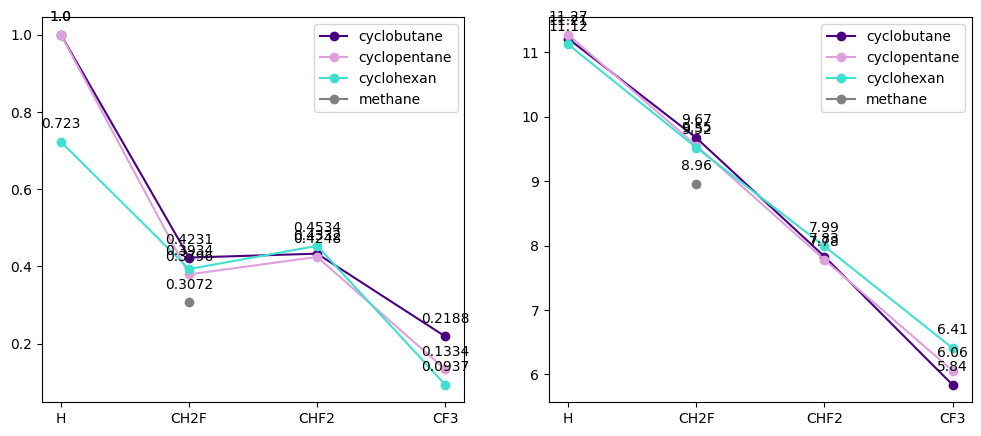

cyclobutane gem-CF2 FC1(F)CNC1 (6.44, 6.884603023529053) 0.1492 Used for train 0
cyclopentane CHF FC1CCNC1 (8.87, 7.829167366027832) 0.515 Used for train 1
cyclopentane gem-CF2 FC1(F)CCNC1 (6.88, 7.063803672790527) -0.2331 Used for train 0
cyclopentane CHF F[C@@H]1CNC[C@@H]1F (7.07, 6.8240647315979) 0.4548 Used for train 1
cyclopentane CHF F[C@@H]1CNC[C@H]1F (7.11, 6.8240647315979) 0.4548 Used for train 1
cyclohexane CHF FC1CCCNC1 (8.64, 8.97996997833252) 0.5342 Used for train 0
cyclohexane gem-CF2 FC1(F)CCCNC1 (6.79, 7.439105987548828) -0.2165 Used for train 0
cyclohexane CHF F[C@@H]1CNC[C@H](F)C1 (6.74, 7.393925666809082) 0.0714 Used for train 1
cyclohexane CHF F[C@@H]1CNC[C@@H](F)C1 (6.22, 7.393925666809082) 0.0714 Used for train 1
cyclohexane CHF F[C@@H]1CCNC[C@@H]1F (7.01, 7.050014495849609) 0.3083 Used for train 1
cyclohexane CHF F[C@@H]1CCNC[C@H]1F (7.02, 7.196150779724121) 0.3083 Used for train 0
cyclohexane CF3 FC(F)(F)C1CCCNC1 (9.01, 9.502872467041016) 0.0395 Used for train 0

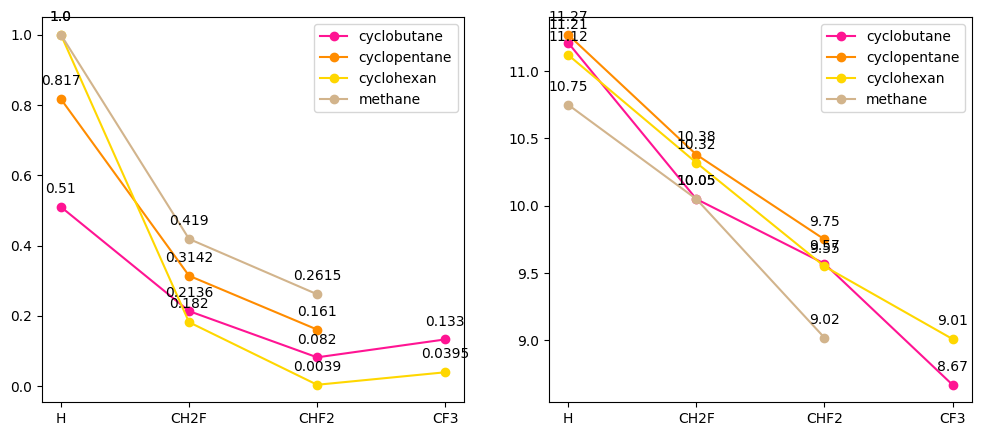

cyclohexane CHF FC1CCNCC1 (9.05, 9.942830085754395) 0.2606 Used for train 0
cyclohexane CHF2 FC(F)C1CCNCC1 (10.19, 10.363476753234863) 0.2322 Used for train 0
cyclohexane CH2F FCC1CCNCC1 (10.46, 10.687161445617676) 0.3309 Used for train 1
methane CH2F NCCCCF (10.36, 9.941690444946289) 0.5097 Used for train 0
methane CHF2 NCCCC(F)F (10.02, 9.396272659301758) 0.3162 Used for train 0
methane CF3 NCCCC(F)(F)F (9.74, 9.13269329071045) 0.2083 Used for train 0
methane gem-CF2 CC(F)(F)CCN (9.57, 9.204269409179688) -0.1099 Used for train 0
cyclohexane gem-CF2 FC1(F)CCNCC1 (7.75, 7.9213643074035645) -0.1336 Used for test 
cyclohexane CF3 FC(F)(F)C1CCNCC1 (9.6, 9.806882858276367) 0.2633 Used for test 
['H', 'CH2F', 'CHF2', 'CF3'] [-0.122, 0.3309, 0.2322, 0.2633] [11.12, 10.46, 10.19, 9.6]
['H', 'CH2F', 'CHF2', 'CF3'] [0.32, 0.5097, 0.3162, 0.2083] [10.03, 10.36, 10.02, 9.74]


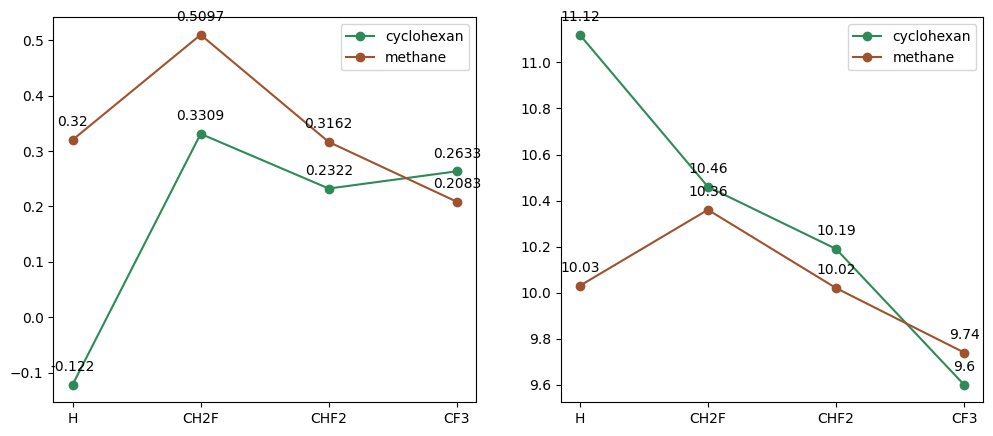

In [216]:
import matplotlib.pyplot as plt

cyclobutane_color = {1: 'indigo', 2: 'deeppink'}
cyclopentane_color = {1: 'plum', 2: 'darkorange'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna'}

cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
methane_name = 'methane'

cyclobutane_logP = {1: {'H': [11.21]}, 2: {'H': [11.21]}}
cyclopentane_logP = {1: {'H': [11.27]}, 2: {'H': [11.27], 'CF3': [8.97]}}
cyclohexan_logP = {1: {'H': [11.12]}, 2: {'H': [11.12]}, 3: {'H': [11.12]}}
methane_logP = {1: {'H': [10.78]}, 2: {'H': [10.75]}, 3: {'H': [10.03]}}

for distance_global in range(1, 4):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    # X_optimal = ['CH2F', 'CHF2', 'CF3', 'CHF', 'gem-CF2']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        smiles_type = "Outlier"
        fold_id = ""
        if SMILES in train_smiles:
            smiles_type = "Used for train"
            fold_id = f"{smiles_to_fold[SMILES]}"
        if SMILES in test_smiles:
            smiles_type = "Used for test"
        logP_value = SMILES_to_pKa[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES][0])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES][0]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES], smiles_type, fold_id)

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES][0])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES][0]]
            print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES], smiles_type, fold_id)

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES][0])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES][0]]
            print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES], smiles_type, fold_id)
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES][0])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES][0]]
            print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES], smiles_type, fold_id)

    for molecule_group, color, label, logP_dict in [(cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP),
                                                    (methane, methane_color, methane_name, methane_logP)]:
        X, y_relevance, y_logP = [], [], []
        if distance_global not in molecule_group:
            continue
        
        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue

            X.append(f_group_optimal)
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(X, y_relevance, y_logP)
        ax1.plot(X, y_relevance, marker='o', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X)):
            ax1.annotate(f"{str(y_relevance[i])}", (X[i], y_relevance[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.plot(X, y_logP, marker='o', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X)):
            ax2.annotate(f"{str(y_logP[i])}", (X[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()

    plt.show()
    
    


cyclohexane CHF2 FC(F)C1CCCCN1 (7.99, 7.922918796539307) 0.4534
cyclopentane CHF2 FC(F)C1CCCN1 (7.78, 8.02009391784668) 0.4248
cyclobutane CF3 FC(F)(F)C1CCN1 (5.84, 7.6481757164001465) 0.2188
cyclobutane CHF2 FC(F)C1CCN1 (7.83, 7.845765113830566) 0.4332
methane CH2F NCCF (8.96, 9.395058631896973) 0.3072
cyclopentane CF3 FC(F)(F)C1CCCN1 (6.06, 6.323980808258057) 0.1334
cyclohexane CF3 FC(F)(F)C1CCCCN1 (6.41, 6.40265417098999) 0.0937
cyclohexane CH2F FCC1CCCCN1 (9.52, 10.110053062438965) 0.3934
cyclopentane CH2F FCC1CCCN1 (9.55, 10.132061004638672) 0.3796
cyclobutane CH2F FCC1CCN1 (9.67, 9.964872360229492) 0.4231
['H', 'CH2F', 'CHF2', 'CF3'] [1.0, 0.4231, 0.4332, 0.2188]
['H', 'CH2F', 'CHF2', 'CF3'] [1.0, 0.3796, 0.4248, 0.1334]
['H', 'CH2F', 'CHF2', 'CF3'] [0.723, 0.3934, 0.4534, 0.0937]
['CH2F'] [0.3072]
['H', 'CH2F', 'CHF2', 'CF3'] [[1.0, 1.0, 0.723], [0.4231, 0.3796, 0.3934, 0.3072], [0.4332, 0.4248, 0.4534], [0.2188, 0.1334, 0.0937]]


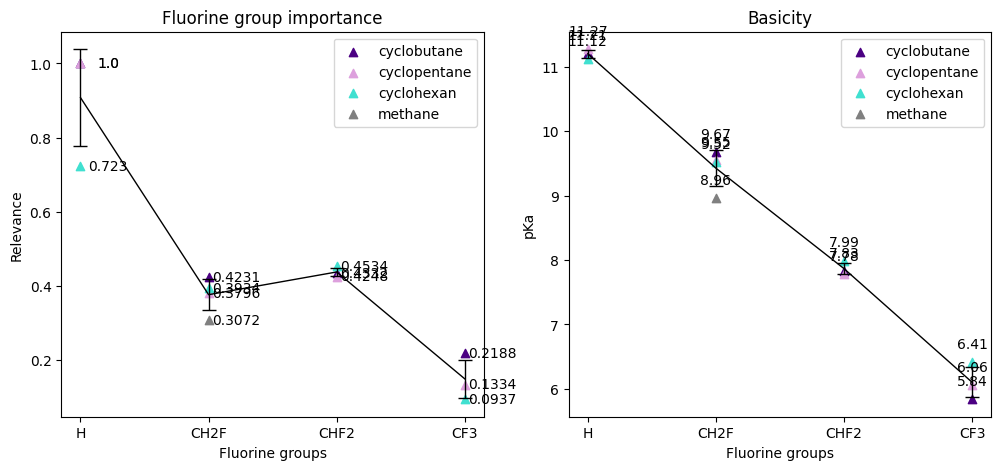

cyclobutane gem-CF2 FC1(F)CNC1 (6.44, 6.884603023529053) 0.1492
cyclopentane CHF FC1CCNC1 (8.87, 7.829167366027832) 0.515
cyclopentane gem-CF2 FC1(F)CCNC1 (6.88, 7.063803672790527) -0.2331
cyclopentane CHF F[C@@H]1CNC[C@@H]1F (7.07, 6.8240647315979) 0.4548
cyclopentane CHF F[C@@H]1CNC[C@H]1F (7.11, 6.8240647315979) 0.4548
cyclohexane CHF FC1CCCNC1 (8.64, 8.97996997833252) 0.5342
cyclohexane gem-CF2 FC1(F)CCCNC1 (6.79, 7.439105987548828) -0.2165
cyclohexane CHF F[C@@H]1CNC[C@H](F)C1 (6.74, 7.393925666809082) 0.0714
cyclohexane CHF F[C@@H]1CNC[C@@H](F)C1 (6.22, 7.393925666809082) 0.0714
cyclohexane CHF F[C@@H]1CCNC[C@@H]1F (7.01, 7.050014495849609) 0.3083
cyclohexane CHF F[C@@H]1CCNC[C@H]1F (7.02, 7.196150779724121) 0.3083
cyclohexane CF3 FC(F)(F)C1CCCNC1 (9.01, 9.502872467041016) 0.0395
cyclohexane CHF2 FC(F)C1CCCNC1 (9.55, 9.733355522155762) 0.0039
cyclohexane CH2F FCC1CCCNC1 (10.32, 10.670539855957031) 0.182
cyclopentane CHF2 FC(F)C1CCNC1 (9.75, 9.490859031677246) 0.161
cyclopentane C

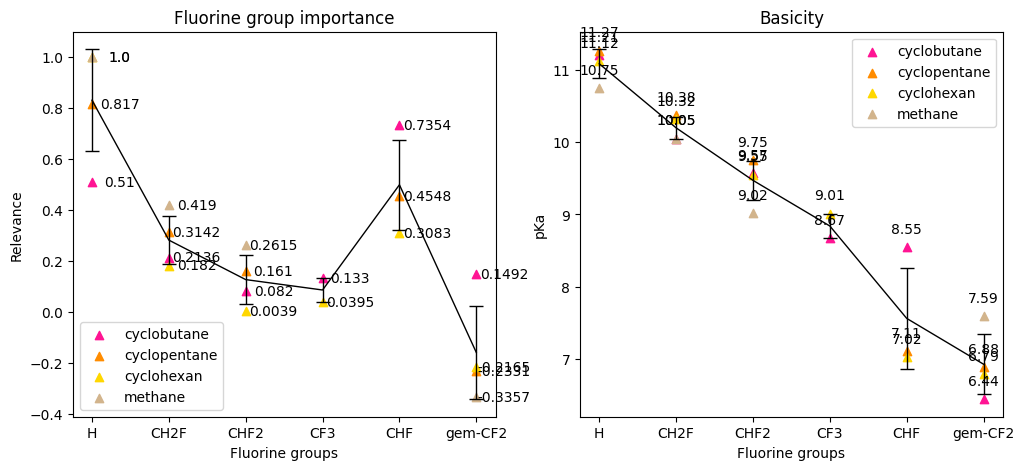

cyclohexane CHF FC1CCNCC1 (9.05, 9.942830085754395) 0.2606
cyclohexane CHF2 FC(F)C1CCNCC1 (10.19, 10.363476753234863) 0.2322
cyclohexane CH2F FCC1CCNCC1 (10.46, 10.687161445617676) 0.3309
methane CH2F NCCCCF (10.36, 9.941690444946289) 0.5097
methane CHF2 NCCCC(F)F (10.02, 9.396272659301758) 0.3162
methane CF3 NCCCC(F)(F)F (9.74, 9.13269329071045) 0.2083
methane gem-CF2 CC(F)(F)CCN (9.57, 9.204269409179688) -0.1099
cyclohexane gem-CF2 FC1(F)CCNCC1 (7.75, 7.9213643074035645) -0.1336
cyclohexane CF3 FC(F)(F)C1CCNCC1 (9.6, 9.806882858276367) 0.2633
['H', 'CH2F', 'CHF2', 'CF3', 'CHF', 'gem-CF2'] [-0.122, 0.3309, 0.2322, 0.2633, 0.2606, -0.1336]
['H', 'CH2F', 'CHF2', 'CF3', 'gem-CF2'] [0.32, 0.5097, 0.3162, 0.2083, -0.1099]
['H', 'CH2F', 'CHF2', 'CF3', 'CHF', 'gem-CF2'] [[-0.122, 0.32], [0.3309, 0.5097], [0.2322, 0.3162], [0.2633, 0.2083], [0.2606], [-0.1336, -0.1099]]


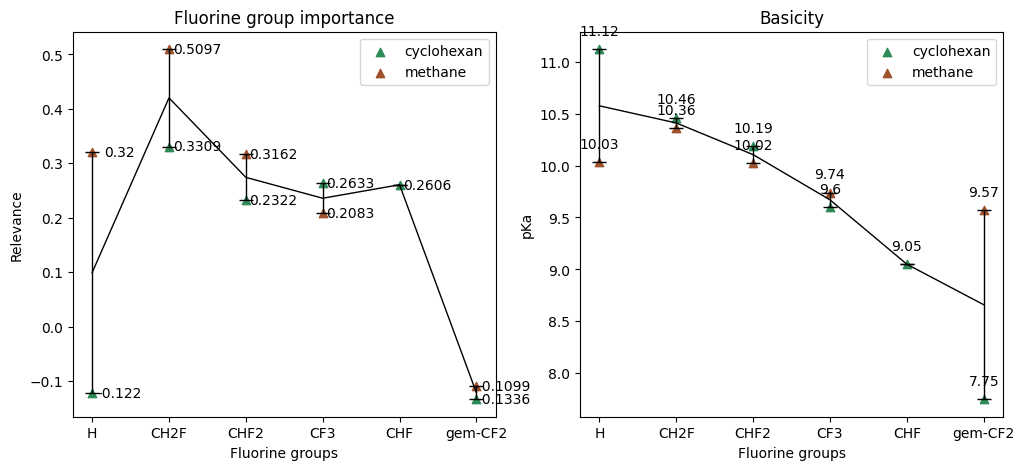

In [217]:
import matplotlib.pyplot as plt
import numpy as np

cyclobutane_color = {1: 'indigo', 2: 'deeppink'}
cyclopentane_color = {1: 'plum', 2: 'darkorange'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna'}

cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
methane_name = 'methane'

cyclobutane_logP = {1: {'H': [11.21]}, 2: {'H': [11.21]}}
cyclopentane_logP = {1: {'H': [11.27]}, 2: {'H': [11.27], 'CF3': [8.97]}}
cyclohexan_logP = {1: {'H': [11.12]}, 2: {'H': [11.12]}, 3: {'H': [11.12]}}
methane_logP = {1: {'H': [10.78]}, 2: {'H': [10.75]}, 3: {'H': [10.03]}}

for distance_global in range(1, 4):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['H', 'CH2F', 'CHF2', 'CF3', 'CHF', 'gem-CF2']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_pKa[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES][0])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES][0]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES][0])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES][0]]
            print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES][0])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES][0]]
            print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES][0])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES][0]]
            print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    for molecule_group, color, label, logP_dict in [(cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(X_local, y_relevance)
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(20, -3), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax1.set_xlabel("Fluorine groups")
    ax1.set_ylabel("Relevance")
    ax1.set_title("Fluorine group importance")

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.plot(X, mean_logP_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax2.set_xlabel("Fluorine groups")
    ax2.set_ylabel("pKa")
    ax2.set_title("Basicity")

    plt.show()
    
    


In [218]:
X

['H', 'CH2F', 'CHF2', 'CF3', 'CHF', 'gem-CF2']

In [219]:
mean_logP_Y

[10.575, 10.41, 10.105, 9.67, 9.05, 8.66]

In [220]:
std_deviation_logP_Y

[0.5449999999999999,
 0.05000000000000071,
 0.08499999999999996,
 0.07000000000000028,
 0.0,
 0.9100000000000001]